In [1]:
# Importing required libraries:

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import plot_likert
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from itertools import product
from scipy.stats import chi2_contingency, chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
# Importing data file:

data = pd.read_excel("C:/Users/sony/Desktop/DataTrained/customer_retention_dataset.xlsx")
code_data = pd.read_excel("C:/Users/sony/Desktop/DataTrained/codesheet.xlsx")
pd.set_option('display.max_columns', None)
code_data.head(2)

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

In [3]:
code_data.shape

(269, 71)

We have 71 variables and 269 records.

In [4]:
# checking the columns in the datasets both the datasets are having same columns:

code_data.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [5]:
# It can be seen from the above that the column names are not properly seperated and named:
# removing unnecessary spaces and characters from the column names of both the datasets:

data.columns = [" ".join([i for i in col.split() if i.isdigit() == False]) for col in code_data.columns]
code_data.columns = [" ".join([i for i in col.split() if i.isdigit() == False]) for col in code_data.columns]

In [6]:
# As the column names are too long it would not be feasable for further analysis:
# Renaming the columns for better understanding,easy reading and making the variable names short:

new_cols = ['Gender', 'Age', 'City', 'Pin', 'Online_rel', 'Num_shop', 'Internet_type', 'Device', 'DScreen_size', 'Dev_OS','Browser','Channel',
            'Path_next_visit','Explore_time', 'Pay_option','Abandon_freq','Abandon_reason','Content_read_understand','Info_for_product_comparison',
           'Info_seller_product','prod_info_clear','Ease_nav','Loading_speed','User_friendly_interface','Suit_pay_method','Trust_transact_time',
           'Cust_Empathy','Cust_privacy','Response_behaviour','Shop_benefits','Enjoy_derived','Shop_online_convenient','Return_policy',
           'Access_loyalty_progm','Display_info_satisfaction','Website_User_satisfaction','Net_benefit_user_satisfaction','Trust_satisfy_user',
           'Wide_variety_product','Complete_prod_info','Monetary_savings','Patronizing_retailor_convenience','Shop_OL_adventurous','Shop_OL_Enhance_SocialStatus',
           'Feel_gratification','Shop_OL_fulfil_roles','Value_for_money','From the following, tick any (or all) of the online retailers you have shopped from;','Easy_use_website','Wepage_visual_appeal','Wide_variety_prod_offer',
           'Complete_prod_description','Fast_loading_speed','Website_reliability','Purchase_completion_speed','Payment_options_availability','Fast_delivery_speed',
           'Customer_info_privacy','Secure_cust_financial_info','Perceived_Trustworthiness','Online_assistance_presence','Long_time_taken_logingin',
           'Long_time_displaying_graphics','Late_price_declaration', 'Longer_pageloading_time','Limited_payment_modes','Longer_delivery_period',
           'Changed_website_design','Disrupted_page_movement','Website_efficiency_sameas_before','Indian_online_retailer_recommendation']

len(new_cols)

71

In [7]:
# replacing the old column names in the coded dataset by new ones:

code_data.set_axis(new_cols, axis=1, inplace=True)
code_data.columns

Index(['Gender', 'Age', 'City', 'Pin', 'Online_rel', 'Num_shop',
       'Internet_type', 'Device', 'DScreen_size', 'Dev_OS', 'Browser',
       'Channel', 'Path_next_visit', 'Explore_time', 'Pay_option',
       'Abandon_freq', 'Abandon_reason', 'Content_read_understand',
       'Info_for_product_comparison', 'Info_seller_product', 'prod_info_clear',
       'Ease_nav', 'Loading_speed', 'User_friendly_interface',
       'Suit_pay_method', 'Trust_transact_time', 'Cust_Empathy',
       'Cust_privacy', 'Response_behaviour', 'Shop_benefits', 'Enjoy_derived',
       'Shop_online_convenient', 'Return_policy', 'Access_loyalty_progm',
       'Display_info_satisfaction', 'Website_User_satisfaction',
       'Net_benefit_user_satisfaction', 'Trust_satisfy_user',
       'Wide_variety_product', 'Complete_prod_info', 'Monetary_savings',
       'Patronizing_retailor_convenience', 'Shop_OL_adventurous',
       'Shop_OL_Enhance_SocialStatus', 'Feel_gratification',
       'Shop_OL_fulfil_roles', 'Value_for

In [8]:
# In the given dataset City and Pincode both are given; only City is suffecient for analysing given dataset.
# Dropping the Pin column:

code_data.drop([ 'Pin'], axis = 1, inplace=True)
code_data.head(2)

,Gender,Age,City,Online_rel,Num_shop,Internet_type,Device,DScreen_size,Dev_OS,Browser,Channel,Path_next_visit,Explore_time,Pay_option,Abandon_freq,Abandon_reason,Content_read_understand,Info_for_product_comparison,Info_seller_product,prod_info_clear,Ease_nav,Loading_speed,User_friendly_interface,Suit_pay_method,Trust_transact_time,Cust_Empathy,Cust_privacy,Response_behaviour,Shop_benefits,Enjoy_derived,Shop_online_convenient,Return_policy,Access_loyalty_progm,Display_info_satisfaction,Website_User_satisfaction,Net_benefit_user_satisfaction,Trust_satisfy_user,Wide_variety_product,Complete_prod_info,Monetary_savings,Patronizing_retailor_convenience,Shop_OL_adventurous,Shop_OL_Enhance_SocialStatus,Feel_gratification,Shop_OL_fulfil_roles,Value_for_money,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy_use_website,Wepage_visual_appeal,Wide_variety_prod_offer,Complete_prod_description,Fast_loading_speed,Website_reliability,Purchase_completion_speed,Payment_options_availability,Fast_delivery_speed,Customer_info_privacy,Secure_cust_financial_info,Perceived_Trustworthiness,Online_assistance_presence,Long_time_taken_logingin,Long_time_displaying_graphics,Late_price_declaration,Longer_pageloading_time,Limited_payment_modes,Longer_delivery_period,Changed_website_design,Disrupted_page_movement,Website_efficiency_sameas_before,Indian_online_retailer_recommendation
0,0,3,Delhi,5,4,4,3,5,1,1,1,1,3,4,3,3,4,3,3,4,4,1,2,2,2,5,4,4,3,1,2,2,4,3,5,4,5,3,3,2,3,4,4,5,4,5,"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,Amazon.in,Amazon.in,Flipkart.com,Paytm.com,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,Delhi,5,5,2,1,2,3,1,1,4,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,3,3,5,5,5,"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Myntra.com","Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com",Myntra.com,"Amazon.com, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,Myntra.com,Myntra.com,"Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"


In [9]:
# checking the null values and column datatype:

for col in code_data.columns:
    print("\nTitle :",col,"\nCol dtype :",code_data[col].dtype," \nNaN val: ",code_data[col].isnull().sum())


Title : Gender 
Col dtype : int64  
NaN val:  0

Title : Age 
Col dtype : int64  
NaN val:  0

Title : City 
Col dtype : object  
NaN val:  0

Title : Online_rel 
Col dtype : int64  
NaN val:  0

Title : Num_shop 
Col dtype : int64  
NaN val:  0

Title : Internet_type 
Col dtype : int64  
NaN val:  0

Title : Device 
Col dtype : int64  
NaN val:  0

Title : DScreen_size 
Col dtype : int64  
NaN val:  0

Title : Dev_OS 
Col dtype : int64  
NaN val:  0

Title : Browser 
Col dtype : int64  
NaN val:  0

Title : Channel 
Col dtype : int64  
NaN val:  0

Title : Path_next_visit 
Col dtype : int64  
NaN val:  0

Title : Explore_time 
Col dtype : int64  
NaN val:  0

Title : Pay_option 
Col dtype : int64  
NaN val:  0

Title : Abandon_freq 
Col dtype : int64  
NaN val:  0

Title : Abandon_reason 
Col dtype : int64  
NaN val:  0

Title : Content_read_understand 
Col dtype : int64  
NaN val:  0

Title : Info_for_product_comparison 
Col dtype : int64  
NaN val:  0

Title : Info_seller_product 


Dataset does not has any Null value.

In [10]:
#Checking the Unique values in each of the columns:
#Also we can find the frequency of each value in a particular column: 

for i in code_data:
    print(code_data[i].value_counts())   
    print("**********************************************************")

1    180
0     89
Name: Gender, dtype: int64
**********************************************************
3    81
2    79
4    70
1    20
5    19
Name: Age, dtype: int64
**********************************************************
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: City, dtype: int64
**********************************************************
5    98
3    65
4    47
1    43
2    16
Name: Online_rel, dtype: int64
**********************************************************
1    114
4     63
5     53
2     29
3     10
Name: Num_shop, dtype: int64
**********************************************************
3    118
2     76
5     71
4      4
Name: Internet_type, dtype: int64
**********************************************************
1    141
2     86
3     30
4     12
Name: Device, dtype: int64
**************

It is a good practice to segment the retention actions based on the customer experience reviews. For segmentation, the dataset has to be recognized or grouped in a set of responses of a particular category. These possible categories could be:

1. Percieved Risk
2. Utilitarian Value
3. Hedonic Value
4. Customer Experience
Thoroughly going through the given dataset , we can see that responses or set of variables can be devided into aforesaid categories.

To proceed further analysis of the given dataset, it has been divided into following sections:

Sec-1 Customer demographics (i.e., age , gender)
Sec-2 Utilitarian transactions
Sec-3 Hedonic transactions 
Sec-4 Perceived risk
Sec-5 Customer Experience (review after transaction)



In [11]:
# Customer Demographics:

customer_demo = code_data.iloc[:,1:14].columns
cust_demographics_cols = customer_demo.to_list()

# Percieved Risk Columns:

percieved_risk = code_data.iloc[:,14:16].columns
Precieved_risk_cols = percieved_risk.to_list()

# Utilitarian Values :

Utilitarian_values = code_data.iloc[:,16:40].columns
Utilitarian_transaction_cols = Utilitarian_values.to_list()

# Hedonic Values:

Hedonic_values = code_data.iloc[:,40:46].columns
Hedonic_transaction_cols = Hedonic_values.to_list()

# Customer Experience:

customer_exp = code_data.iloc[:,46:].columns
Customer_Experience_cols = customer_exp.to_list()

Section - 1 : Analysis of Customer Demographics

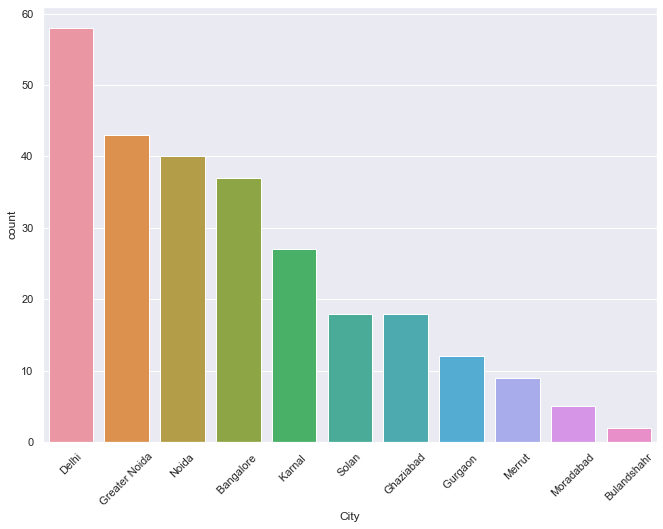

In [12]:
# NUMBER OF LOGINS WITH RESPECT TO CITIES:

sns.set(rc = {'figure.figsize':(11,8)})
sns.countplot(code_data['City'],order = code_data['City'].value_counts().index, label = 'Count')
plt.xticks(rotation = 45);

Maximum numbers of logins are from Delhi followed by Greater Noida and Noida. Banglore is also having sufficiently large number of logins.

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64


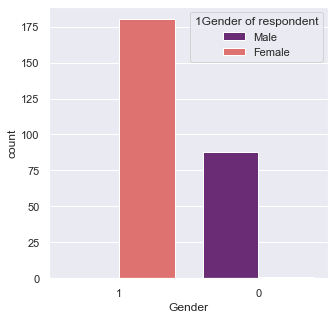

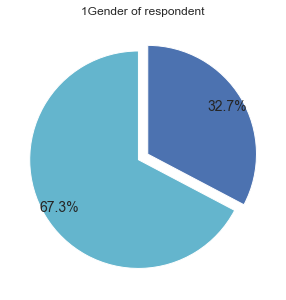

<Figure size 504x504 with 0 Axes>

In [13]:
# SHOPPING OR LOGIN RATIO WITH RESPECT TO GENDER:

sns.set(rc = {'figure.figsize':(5,5)})
sns.countplot(code_data['Gender'], palette = "magma", order = code_data['Gender'].value_counts().index, hue = data['1Gender of respondent'])

fig1, ax1 = plt.subplots()
x=data["1Gender of respondent"].value_counts()
print(x)
plt.figure(figsize=(7,7))
mycolors = ['c', 'b']
ax1.pie(x,autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = (0.05,0.05),textprops={'fontsize': 14}, colors = mycolors)
ax1.set_title('1Gender of respondent');

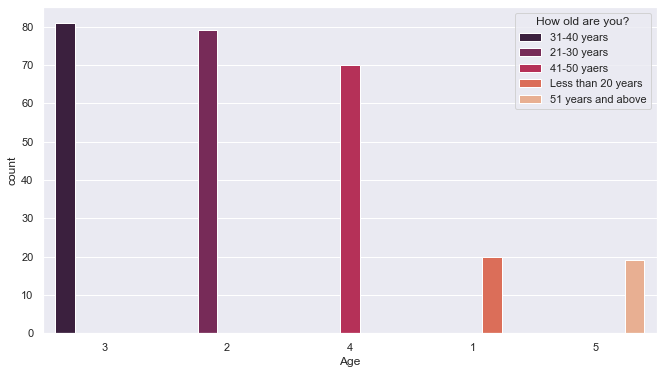

<Figure size 504x504 with 0 Axes>

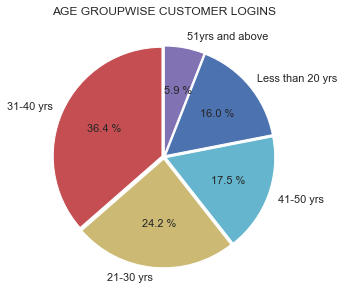

In [14]:
# RATIO OF CUSTOMERS WITH RESPECT TO AGE GROUP:

plt.figure(figsize = (11,6))
sns.countplot(code_data['Age'],order = code_data['Age'].value_counts().index,palette = "rocket",hue = data['How old are you?']);


plt.figure(figsize=(7,7))
x=data["Since How Long You are Shopping Online ?"].value_counts()
fig1, ax1 = plt.subplots()
mycolors = ['r','y','c', 'b', 'm']
mylabels = ['31-40 yrs', '21-30 yrs', '41-50 yrs', 'Less than 20 yrs', '51yrs and above']
ax1.pie(x, explode = (0.020,0.020,.020,.020,.020), autopct ='% 1.1f %%',startangle = 90,colors = mycolors,textprops={'fontsize': 11},labels=mylabels)
ax1.set_title('AGE GROUPWISE CUSTOMER LOGINS');

<Figure size 504x504 with 0 Axes>

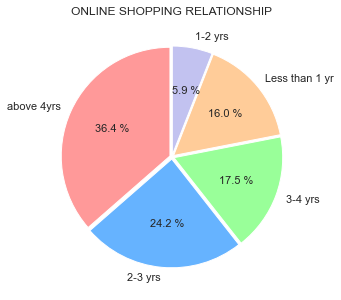

In [15]:
# RATIO OF PEOPLE WITH RESPECT TO THE ONLINE SHOPPING RELATION:

plt.figure(figsize=(7,7))
x = data['Since How Long You are Shopping Online ?'].value_counts()
fig1, ax1 = plt.subplots()
mycolors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']
mylabels = ['above 4yrs', '2-3 yrs', '3-4 yrs', 'Less than 1 yr', '1-2 yrs']
ax1.pie(x, explode = (0.020,0.020,.020,.020,.020), autopct ='% 1.1f %%',startangle = 90,colors = mycolors,textprops={'fontsize': 11},labels=mylabels)
ax1.set_title('ONLINE SHOPPING RELATIONSHIP');

From above plot it can be observed that the most active customers are having online relationship of above 4 years.

<Figure size 504x504 with 0 Axes>

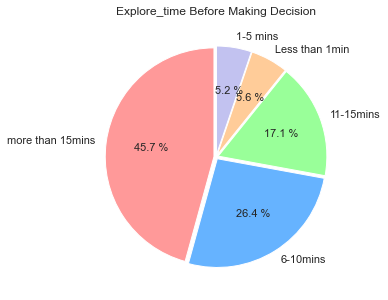

In [16]:
# EXPLORING TIME ON E-RETAIL STORE BEFORE MAKING DECISION:

plt.figure(figsize=(7,7))
x = data['How much time do you explore the e- retail store before making a purchase decision?'].value_counts()
fig1, ax1 = plt.subplots()
mycolors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']
mylabels = ['more than 15mins', '6-10mins', '11-15mins', 'Less than 1min', '1-5 mins']
ax1.pie(x, explode = (0.020,0.020,.020,.020,.020), autopct ='% 1.1f %%',startangle = 90,colors = mycolors,textprops={'fontsize': 11},labels=mylabels)
ax1.set_title('Explore_time Before Making Decision');

From above plot it is seen that most of the customers explore more than 15 minutes before making a purchase decision.

<Figure size 504x504 with 0 Axes>

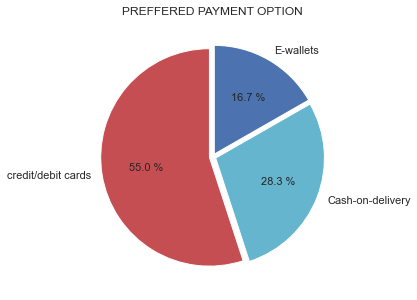

In [17]:
# RATIO WITH RESPECT TO PREFFERED PAYMENT OPTION:

plt.figure(figsize=(7,7))
x = data['What is your preferred payment Option?'].value_counts()
fig1, ax1 = plt.subplots()
mycolors = ['r','c', 'b']
mylabels = ['credit/debit cards', 'Cash-on-delivery', 'E-wallets']
ax1.pie(x, explode = (0.030,0.030,.030), autopct ='% 1.1f %%',startangle = 90,colors = mycolors,textprops={'fontsize': 11},labels=mylabels)
ax1.set_title('PREFFERED PAYMENT OPTION');

Payment through Credit/Debit card is most preffered by the customers making online shopping.

Section - 2: Analysis of Utilitarian transactions

In [18]:
Utilitarian_transaction_cols

['Content_read_understand',
 'Info_for_product_comparison',
 'Info_seller_product',
 'prod_info_clear',
 'Ease_nav',
 'Loading_speed',
 'User_friendly_interface',
 'Suit_pay_method',
 'Trust_transact_time',
 'Cust_Empathy',
 'Cust_privacy',
 'Response_behaviour',
 'Shop_benefits',
 'Enjoy_derived',
 'Shop_online_convenient',
 'Return_policy',
 'Access_loyalty_progm',
 'Display_info_satisfaction',
 'Website_User_satisfaction',
 'Net_benefit_user_satisfaction',
 'Trust_satisfy_user',
 'Wide_variety_product',
 'Complete_prod_info',
 'Monetary_savings']

<Figure size 504x504 with 0 Axes>

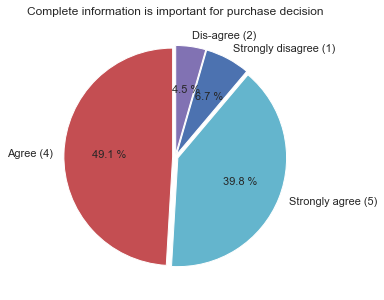

In [19]:
# RATIO WITH RESPECT TO CONTENT/PRODUCT INFORMATION :

plt.figure(figsize=(7,7))
x = data['All relevant information on listed products must be stated clearly'].value_counts()
fig1, ax1 = plt.subplots()
mycolors = ['r','c', 'b', 'm']
mylabels = ['Agree (4)', 'Strongly agree (5)', 'Strongly disagree (1)','Dis-agree (2)']
ax1.pie(x, explode = (0.025,0.025,.025,.025), autopct ='% 1.1f %%',startangle = 90,colors = mycolors,textprops={'fontsize': 11},labels=mylabels)
ax1.set_title('Complete information is important for purchase decision');

<Figure size 648x648 with 0 Axes>

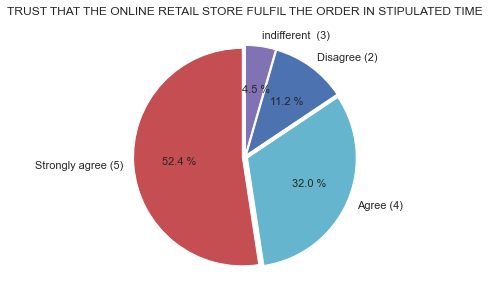

In [20]:
#  RATIO OF USERS WHO BELIEVE THAT TRUST THAT THE ONLINE RETAIL STORE WILL FULFILL IT IN STIPULATED TIME:

plt.figure(figsize=(9,9))
x = data['Trust that the online retail store will fulfill its part of the transaction at the stipulated time'].value_counts()
fig1, ax1 = plt.subplots()
mycolors = ['r','c', 'b', 'm']
mylabels = ['Strongly agree (5)', 'Agree (4)', 'Disagree (2)','indifferent  (3)']
ax1.pie(x, explode = (0.025,0.025,.025,.025), autopct ='% 1.1f %%',startangle = 90,colors = mycolors,textprops={'fontsize': 11},labels=mylabels)
ax1.set_title('TRUST THAT THE ONLINE RETAIL STORE FULFIL THE ORDER IN STIPULATED TIME');

<Figure size 648x648 with 0 Axes>

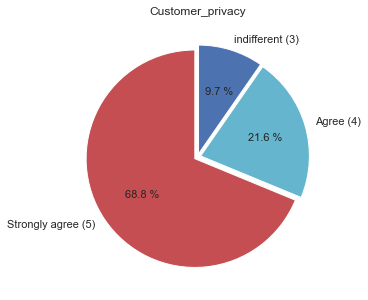

In [21]:
# RATIO OF USERS WHO BELIEVE THAT GUARANTEING THE PRIVACY OF CUSTOMER IS IMPORT TO MAKE A DECISION:


plt.figure(figsize=(9,9))
x = data['Being able to guarantee the privacy of the customer'].value_counts()
fig1, ax1 = plt.subplots()
mycolors = ['r','c', 'b']
mylabels = ['Strongly agree (5)', 'Agree (4)', 'indifferent (3)']
ax1.pie(x, explode = (0.030,0.030,.030), autopct ='% 1.1f %%',startangle = 90,colors = mycolors,textprops={'fontsize': 11},labels=mylabels)
ax1.set_title('Customer_privacy');

<Figure size 648x648 with 0 Axes>

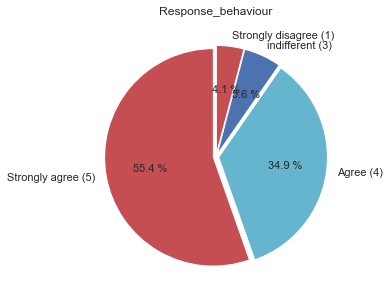

In [22]:
# RATIO OF USERS WITH RESPECT TO RESPONSE BEHAVIOUR OF THE STORE  :

plt.figure(figsize=(9,9))
x = data['Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'].value_counts()
fig1, ax1 = plt.subplots()
mycolors = ['r','c', 'b']
mylabels = ['Strongly agree (5)', 'Agree (4)', 'indifferent (3)', 'Strongly disagree (1)']
ax1.pie(x, explode = (0.025,0.025,.025,.025), autopct ='% 1.1f %%',startangle = 90,colors = mycolors,textprops={'fontsize': 11},labels=mylabels)
ax1.set_title('Response_behaviour');

<Figure size 648x648 with 0 Axes>

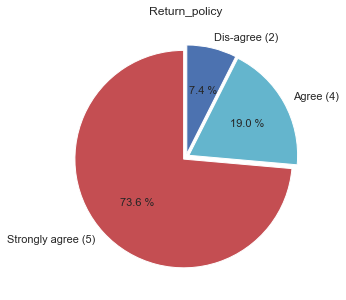

In [23]:
# Return and replacement policy of the e-tailer is important for purchase decision:


plt.figure(figsize=(9,9))
x = data['Return and replacement policy of the e-tailer is important for purchase decision'].value_counts()
fig1, ax1 = plt.subplots()
mycolors = ['r','c', 'b']
mylabels = ['Strongly agree (5)', 'Agree (4)', 'Dis-agree (2)']
ax1.pie(x, explode = (0.030,0.030,.030), autopct ='% 1.1f %%',startangle = 90,colors = mycolors,textprops={'fontsize': 11},labels=mylabels)
ax1.set_title('Return_policy');

<Figure size 648x648 with 0 Axes>

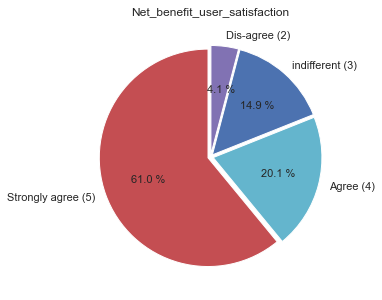

In [24]:
# RATIO OF CUSTOMERS BELIEVING THAT NET BENEFIT BRING USER SATISFACTION :

plt.figure(figsize=(9,9))
x = data['Net Benefit derived from shopping online can lead to users satisfaction'].value_counts()
fig1, ax1 = plt.subplots()
mycolors = ['r','c', 'b', 'm']
mylabels = ['Strongly agree (5)', 'Agree (4)', 'indifferent (3)','Dis-agree (2)']
ax1.pie(x, explode = (0.025,0.025,.025,.025), autopct ='% 1.1f %%',startangle = 90,colors = mycolors,textprops={'fontsize': 11},labels=mylabels)
ax1.set_title('Net_benefit_user_satisfaction');

<Figure size 648x648 with 0 Axes>

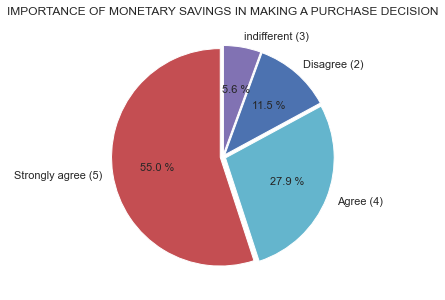

In [25]:
# IMPORTANCE OF MONETARY SAVINGS IN MAKING A PURCHASE DECISION :

plt.figure(figsize=(9,9))
x = data['Monetary savings'].value_counts()
fig1, ax1 = plt.subplots()
mycolors = ['r','c', 'b', 'm']
mylabels = ['Strongly agree (5)', 'Agree (4)', 'Disagree (2)','indifferent (3)']
ax1.pie(x, explode = (0.025,0.025,.025,.025), autopct ='% 1.1f %%',startangle = 90,colors = mycolors,textprops={'fontsize': 11},labels=mylabels)
ax1.set_title('IMPORTANCE OF MONETARY SAVINGS IN MAKING A PURCHASE DECISION');

Sec-3 Hedoneic transactions 

<Figure size 648x648 with 0 Axes>

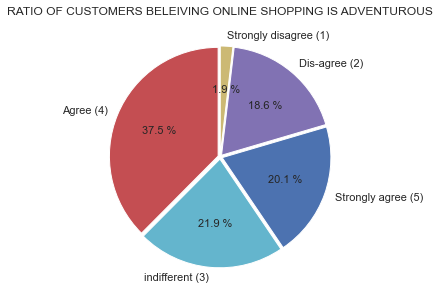

In [27]:
# RATIO OF CUSTOMERS BELEIVING ONLINE SHOPPING IS ADVENTUROUS:

plt.figure(figsize=(9,9))
x = data['Shopping on the website gives you the sense of adventure'].value_counts()
fig1, ax1 = plt.subplots()
mycolors = ['r','c', 'b', 'm','y']
mylabels = ['Agree (4)', 'indifferent (3)', 'Strongly agree (5)','Dis-agree (2)', 'Strongly disagree (1)']
ax1.pie(x, explode = (0.020,0.020,.020,.020,.020), autopct ='% 1.1f %%',startangle = 90,colors = mycolors,textprops={'fontsize': 11},labels=mylabels)
ax1.set_title('RATIO OF CUSTOMERS BELEIVING ONLINE SHOPPING IS ADVENTUROUS');

<Figure size 648x648 with 0 Axes>

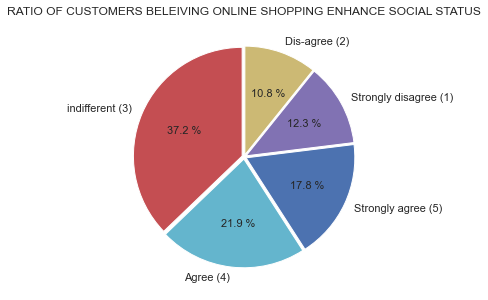

In [28]:
# RATIO OF CUSTOMERS BELEIVING ONLINE SHOPPING ENHANCE SOCIAL STATUS:

plt.figure(figsize=(9,9))
x = data['Shopping on your preferred e-tailer enhances your social status'].value_counts()
fig1, ax1 = plt.subplots()
mycolors = ['r','c', 'b', 'm','y']
mylabels = ['indifferent (3)', 'Agree (4)', 'Strongly agree (5)','Strongly disagree (1)', 'Dis-agree (2)']
ax1.pie(x, explode = (0.020,0.020,.020,.020,.020), autopct ='% 1.1f %%',startangle = 90,colors = mycolors,textprops={'fontsize': 11},labels=mylabels)
ax1.set_title('RATIO OF CUSTOMERS BELEIVING ONLINE SHOPPING ENHANCE SOCIAL STATUS');

<Figure size 648x648 with 0 Axes>

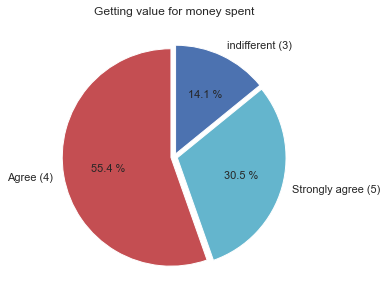

In [29]:
# Getting value for money spent:

plt.figure(figsize=(9,9))
x = data['Getting value for money spent'].value_counts()
fig1, ax1 = plt.subplots()
mycolors = ['r','c', 'b']
mylabels = [ 'Agree (4)', 'Strongly agree (5)','indifferent (3)']
ax1.pie(x, explode = (0.030,0.030,.030), autopct ='% 1.1f %%',startangle = 90,colors = mycolors,textprops={'fontsize': 11},labels=mylabels)
ax1.set_title('Getting value for money spent');

SECTION - 4 Percieved risk

<Figure size 648x648 with 0 Axes>

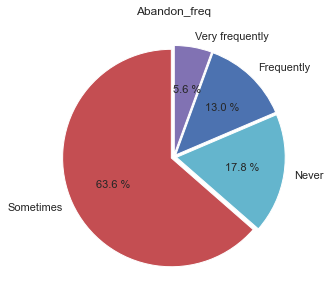

In [30]:
# How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?

plt.figure(figsize=(9,9))
x = data['How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?'].value_counts()
fig1, ax1 = plt.subplots()
mycolors = ['r','c', 'b','m']
mylabels = [ 'Sometimes', 'Never','Frequently', 'Very frequently']
ax1.pie(x, explode = (0.025,0.025,.025,.025), autopct ='% 1.1f %%',startangle = 90,colors = mycolors,textprops={'fontsize': 11},labels=mylabels)
ax1.set_title('Abandon_freq');

<Figure size 648x648 with 0 Axes>

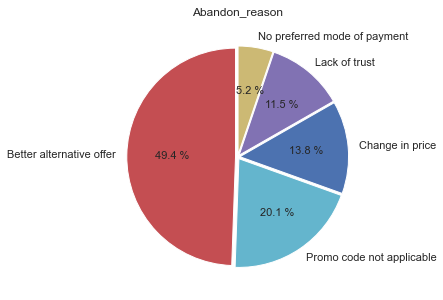

In [31]:
# Why did you abandon the “Bag”, “Shopping Cart”?

plt.figure(figsize=(9,9))
x = data['Why did you abandon the “Bag”, “Shopping Cart”?'].value_counts()
fig1, ax1 = plt.subplots()
mycolors = ['r','c', 'b', 'm','y']
mylabels = ['Better alternative offer', 'Promo code not applicable', 'Change in price','Lack of trust', 'No preferred mode of payment']
ax1.pie(x, explode = (0.020,0.020,.020,.020,.020), autopct ='% 1.1f %%',startangle = 90,colors = mycolors,textprops={'fontsize': 11},labels=mylabels)
ax1.set_title('Abandon_reason');

Sec-5 Customer Experience (review after transaction)

In [32]:
Customer_Experience_cols

['From the following, tick any (or all) of the online retailers you have shopped from;',
 'Easy_use_website',
 'Wepage_visual_appeal',
 'Wide_variety_prod_offer',
 'Complete_prod_description',
 'Fast_loading_speed',
 'Website_reliability',
 'Purchase_completion_speed',
 'Payment_options_availability',
 'Fast_delivery_speed',
 'Customer_info_privacy',
 'Secure_cust_financial_info',
 'Perceived_Trustworthiness',
 'Online_assistance_presence',
 'Long_time_taken_logingin',
 'Long_time_displaying_graphics',
 'Late_price_declaration',
 'Longer_pageloading_time',
 'Limited_payment_modes',
 'Longer_delivery_period',
 'Changed_website_design',
 'Disrupted_page_movement',
 'Website_efficiency_sameas_before',
 'Indian_online_retailer_recommendation']

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: From the following, tick any (or all) of the online retailers you have shopped from;, dtype: int64


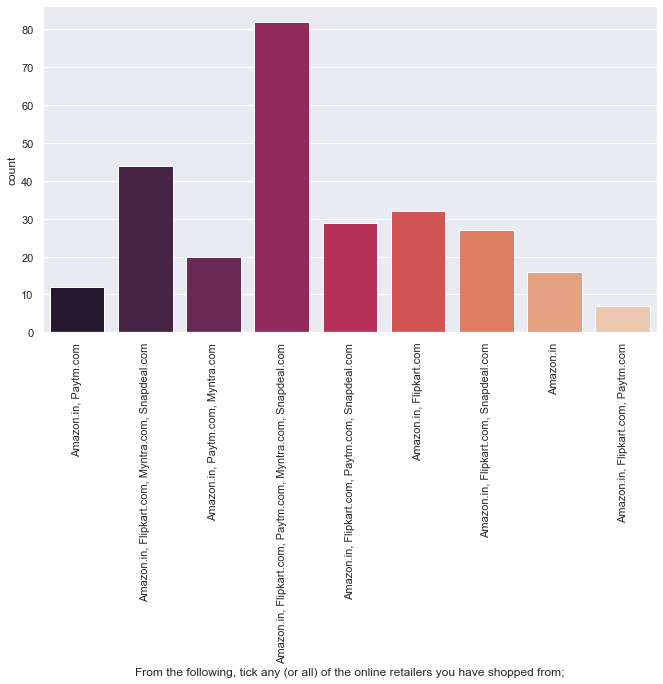

*******************************************************************************************************************************



Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: Easy_use_website, dtype: int64


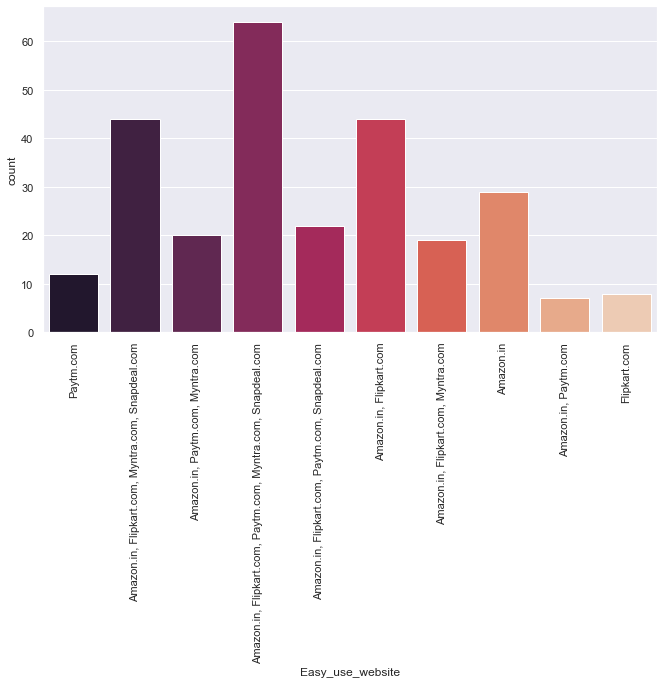

*******************************************************************************************************************************



Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Myntra.com                                           15
Myntra.com                                                      15
Flipkart.com, Myntra.com                                        15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11
Name: Wepage_visual_appeal, dtype: int64


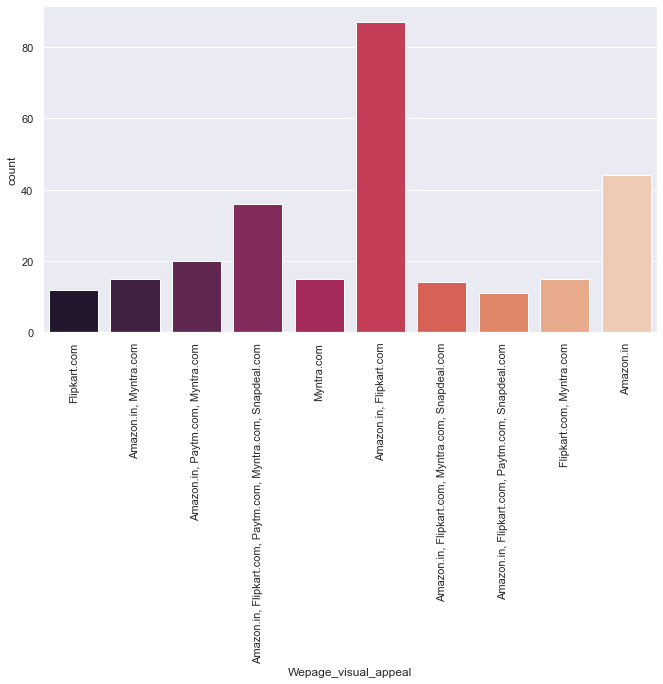

*******************************************************************************************************************************



Amazon.in, Flipkart.com                              130
Amazon.in                                             43
Amazon.in, Myntra.com                                 20
Myntra.com                                            15
Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     14
Amazon.in, Flipkart.com, Paytm.com                    13
Flipkart.com                                          12
Paytm.com                                              7
Name: Wide_variety_prod_offer, dtype: int64


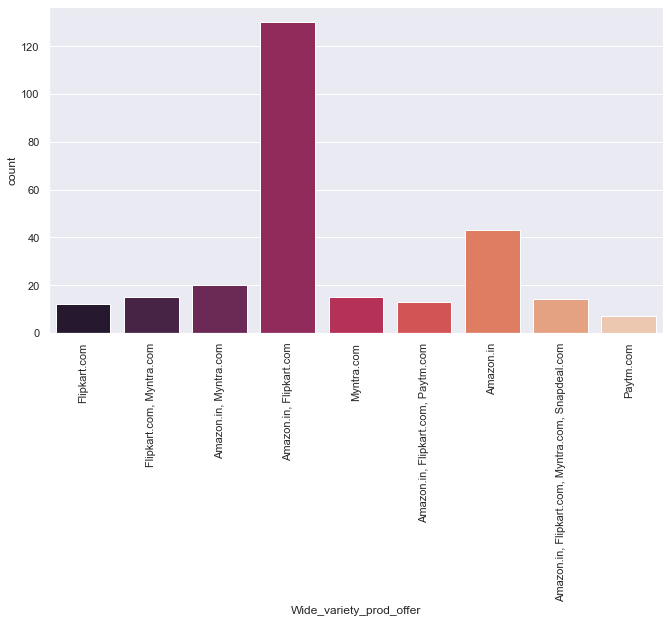

*******************************************************************************************************************************



Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: Complete_prod_description, dtype: int64


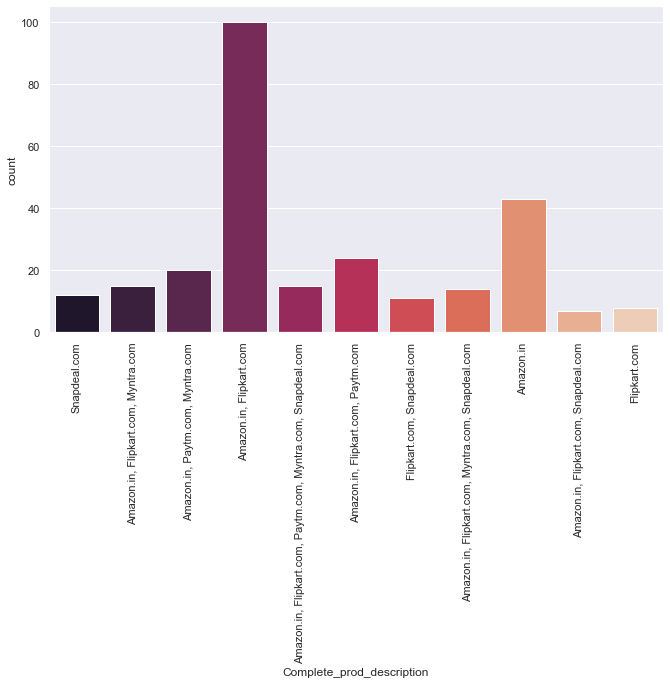

*******************************************************************************************************************************



Amazon.in                                                       51
Amazon.in, Paytm.com                                            44
Amazon.in, Flipkart.com, Myntra.com                             30
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30
Amazon.in, Flipkart.com                                         30
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com, Paytm.com                              25
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Snapdeal.com                                                    12
Flipkart.com                                                     8
Name: Fast_loading_speed, dtype: int64


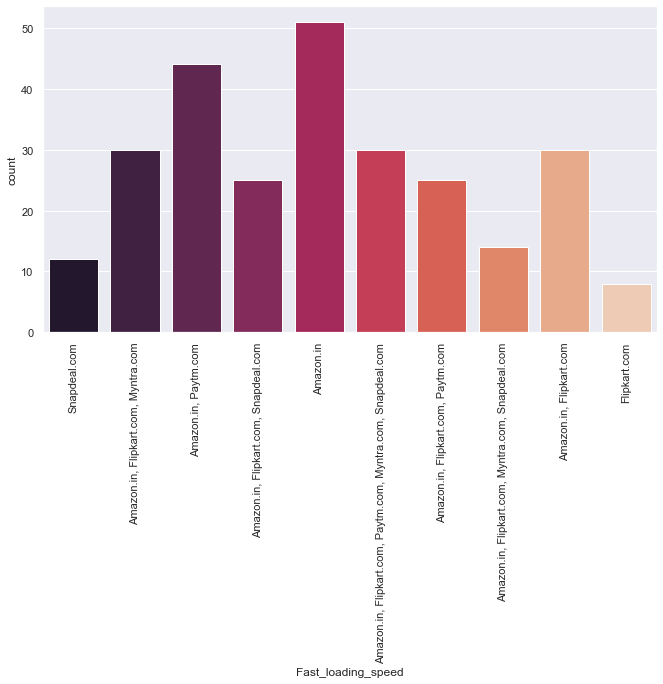

*******************************************************************************************************************************



Amazon.in                                            61
Amazon.in, Flipkart.com                              50
Amazon.in, Flipkart.com, Paytm.com                   36
Amazon.in, Paytm.com, Myntra.com                     35
Amazon.in, Flipkart.com, Snapdeal.com                18
Flipkart.com                                         15
Myntra.com                                           15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    14
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com     13
Paytm.com                                            12
Name: Website_reliability, dtype: int64


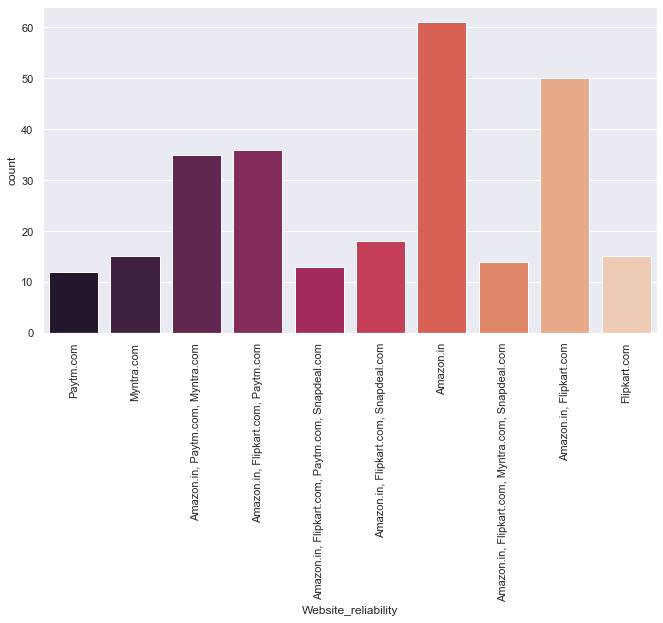

*******************************************************************************************************************************



Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com                                                 15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: Purchase_completion_speed, dtype: int64


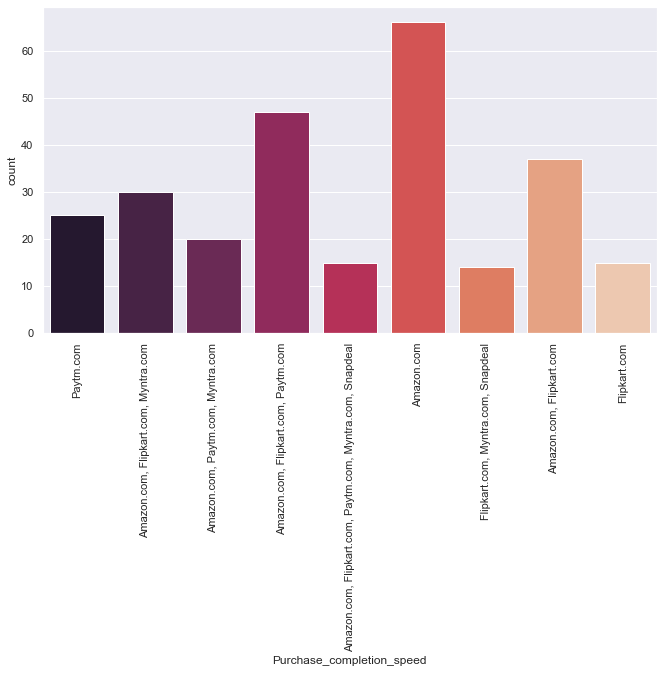

*******************************************************************************************************************************



Amazon.in, Flipkart.com                                         65
Amazon.in, Flipkart.com, Myntra.com                             40
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    39
Amazon.in                                                       23
Patym.com, Myntra.com                                           20
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               19
Amazon.in, Flipkart.com, Snapdeal.com                           18
Flipkart.com, Myntra.com, Snapdeal.com                          14
Patym.com                                                       12
Amazon.in, Patym.com                                            11
Flipkart.com                                                     8
Name: Payment_options_availability, dtype: int64


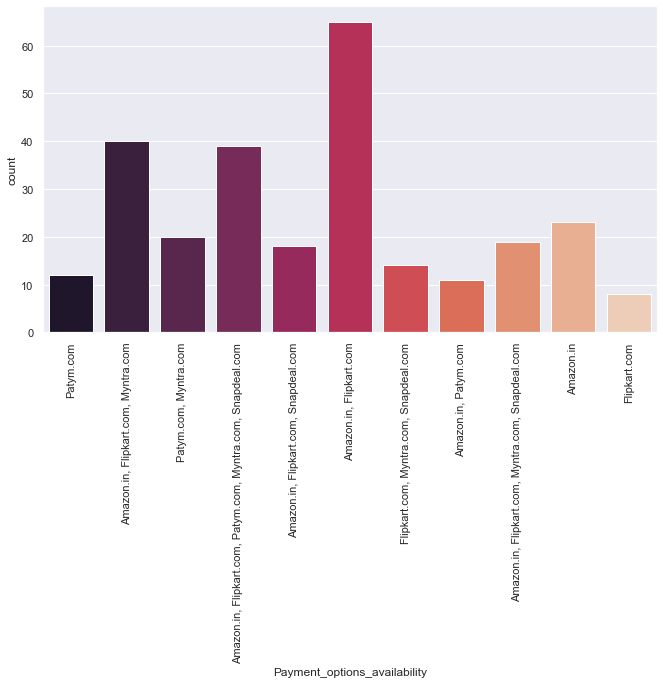

*******************************************************************************************************************************



Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com                               15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: Fast_delivery_speed, dtype: int64


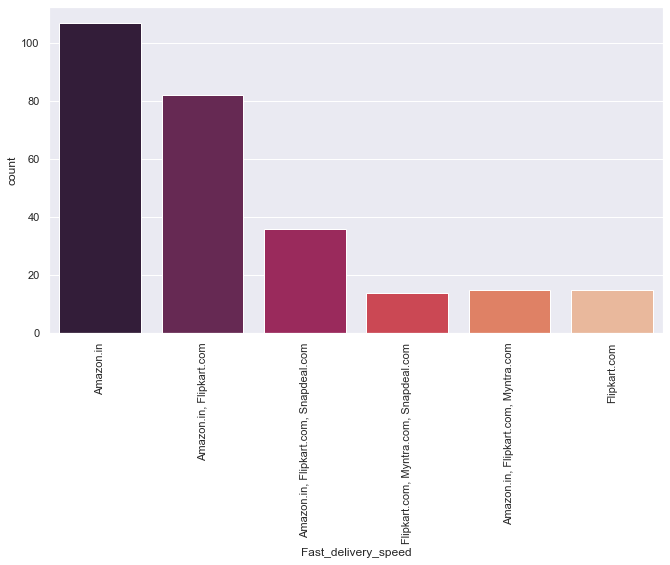

*******************************************************************************************************************************



Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Amazon.in, Paytm.com                                            15
Flipkart.com                                                    15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: Customer_info_privacy, dtype: int64


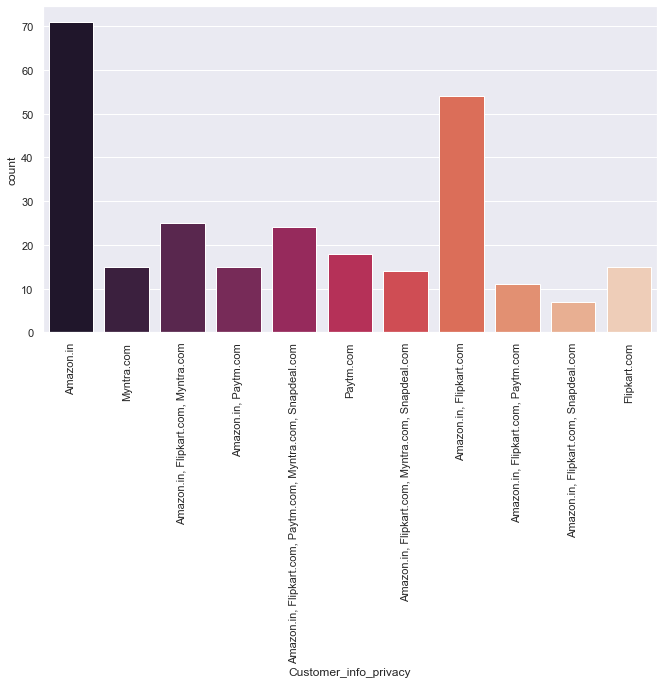

*******************************************************************************************************************************



Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Paytm.com                                                       15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Secure_cust_financial_info, dtype: int64


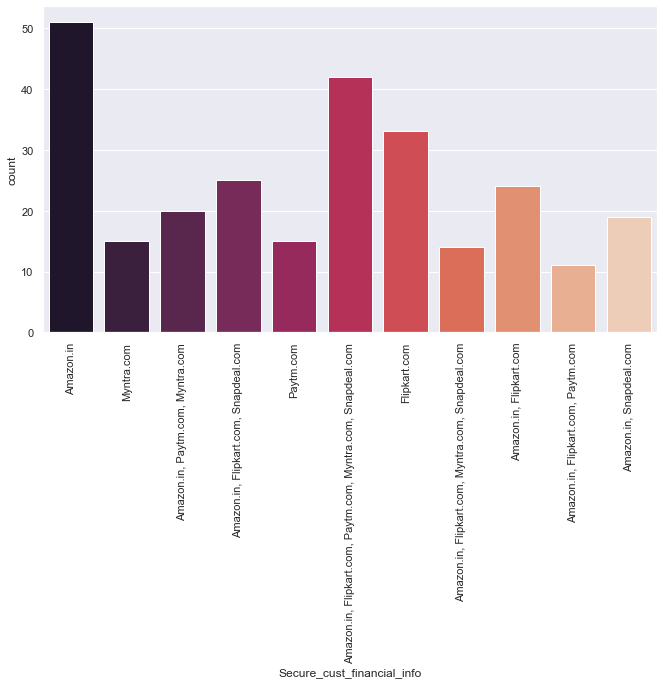

*******************************************************************************************************************************



Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Perceived_Trustworthiness, dtype: int64


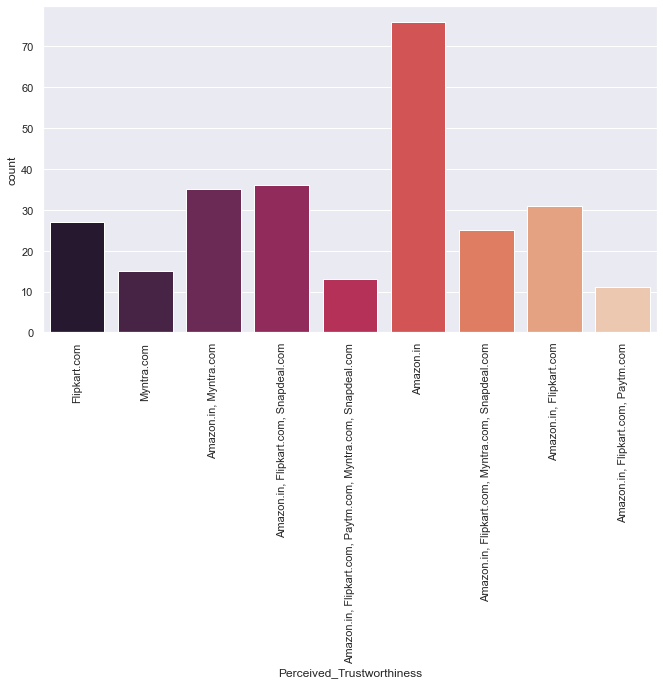

*******************************************************************************************************************************



Amazon.in, Flipkart.com, Myntra.com, Snapdeal    61
Amazon.in                                        60
Amazon.in, Flipkart.com                          39
Amazon.in, Snapdeal                              26
Myntra.com                                       20
Amazon.in, Flipkart.com, Myntra.com              15
Amazon.in, Myntra.com                            15
Amazon.in, Flipkart.com, Paytm.com               13
Paytm.com                                        12
Flipkart.com                                      8
Name: Online_assistance_presence, dtype: int64


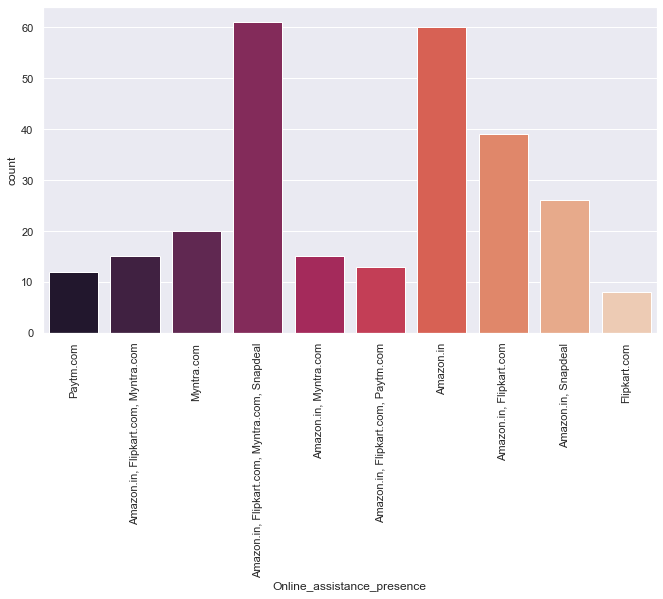

*******************************************************************************************************************************



Amazon.in                                57
Paytm.com                                38
Amazon.in, Flipkart.com                  38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: Long_time_taken_logingin, dtype: int64


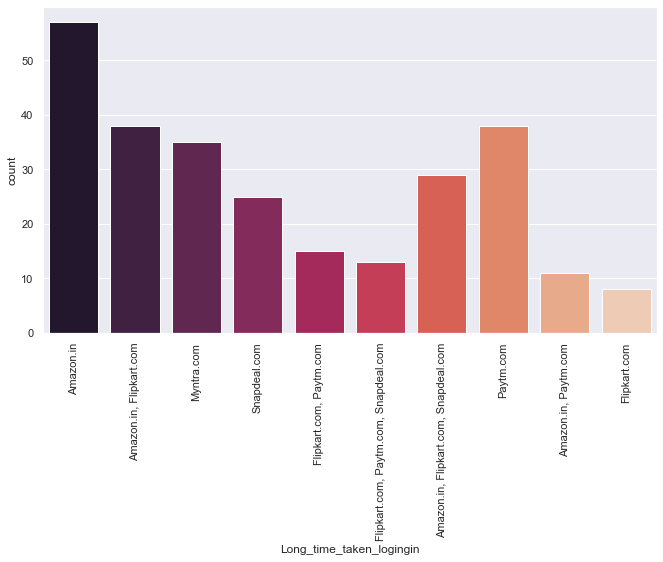

*******************************************************************************************************************************



Amazon.in, Flipkart.com                60
Amazon.in                              39
Myntra.com                             35
Snapdeal.com                           34
Myntra.com, Snapdeal.com               25
Flipkart.com, Snapdeal.com             19
Paytm.com                              15
Flipkart.com                           15
Amazon.in, Myntra.com, Snapdeal.com    14
Amazon.in, Paytm.com                   13
Name: Long_time_displaying_graphics, dtype: int64


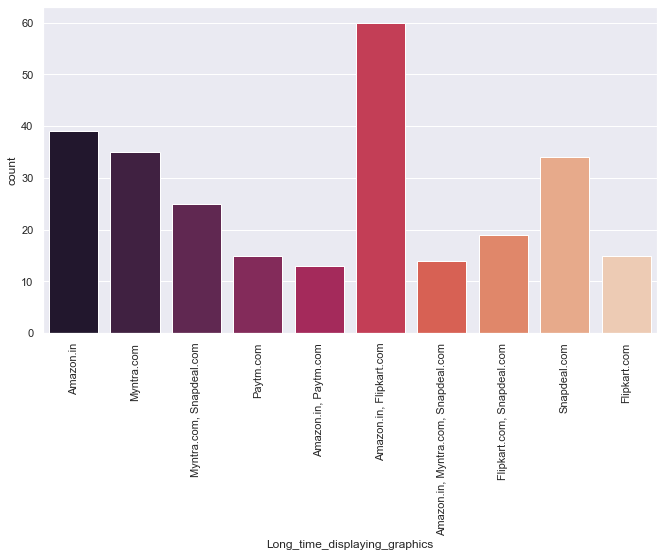

*******************************************************************************************************************************



Myntra.com                 75
Paytm.com                  52
snapdeal.com               41
Amazon.in                  38
Flipkart.com               38
Amazon.in, Paytm.com       13
Paytm.com, snapdeal.com     7
Amazon.in, Flipkart.com     5
Name: Late_price_declaration, dtype: int64


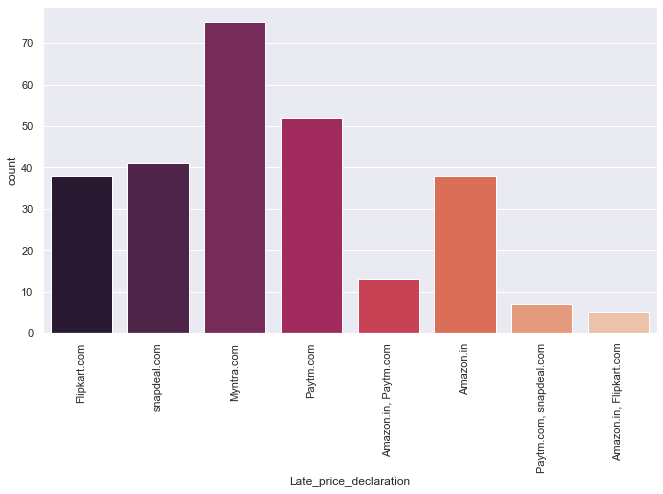

*******************************************************************************************************************************



Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: Longer_pageloading_time, dtype: int64


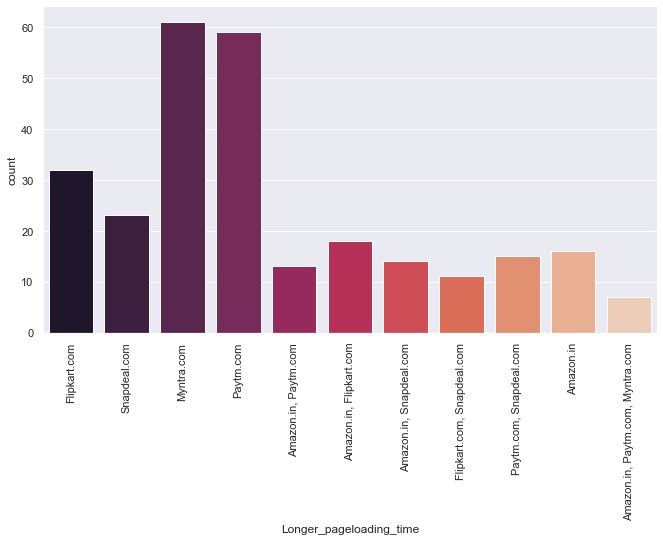

*******************************************************************************************************************************



Snapdeal.com                87
Amazon.in                   62
Flipkart.com                31
Amazon.in, Flipkart.com     29
Paytm.com                   25
Paytm.com, Snapdeal.com     15
Amazon.in, Paytm.com        13
Myntra.com, Snapdeal.com     7
Name: Limited_payment_modes, dtype: int64


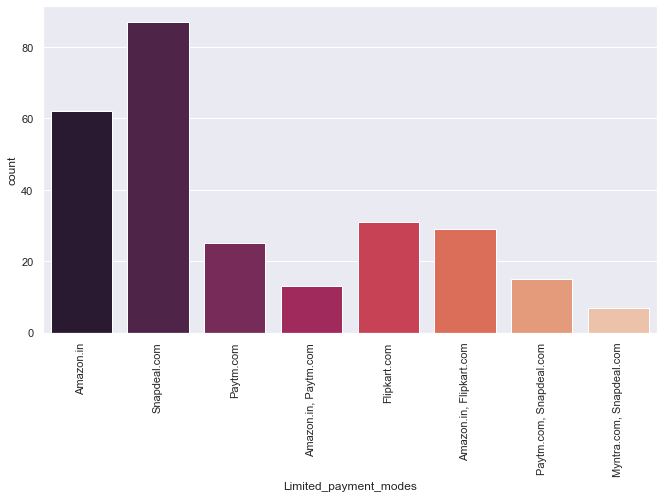

*******************************************************************************************************************************



Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Paytm.com, Snapdeal.com    26
Myntra.com                 26
Name: Longer_delivery_period, dtype: int64


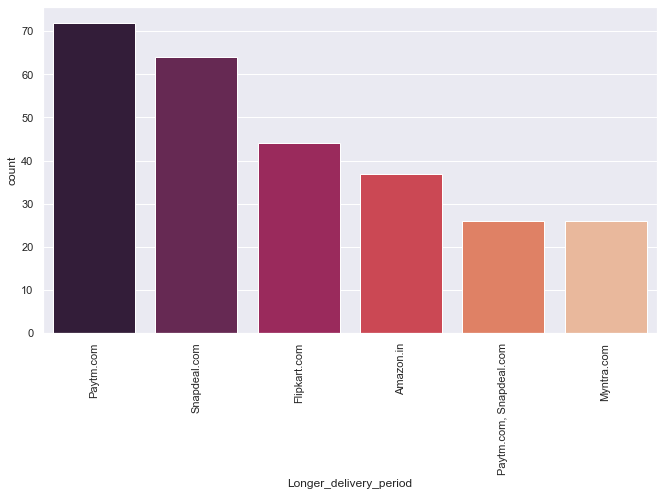

*******************************************************************************************************************************



Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: Changed_website_design, dtype: int64


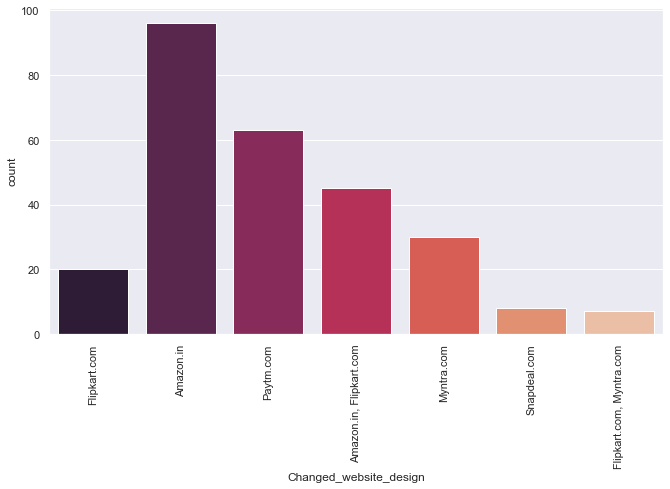

*******************************************************************************************************************************



Amazon.in                     53
Myntra.com                    52
Snapdeal.com                  49
Paytm.com                     39
Flipkart.com                  26
Amazon.in, Flipkart.com       25
Myntra.com, Snapdeal.com      14
Flipkart.com, Snapdeal.com    11
Name: Disrupted_page_movement, dtype: int64


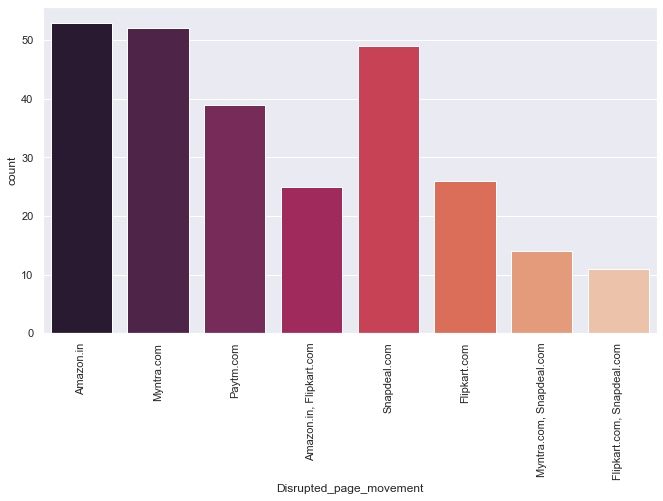

*******************************************************************************************************************************



Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: Website_efficiency_sameas_before, dtype: int64


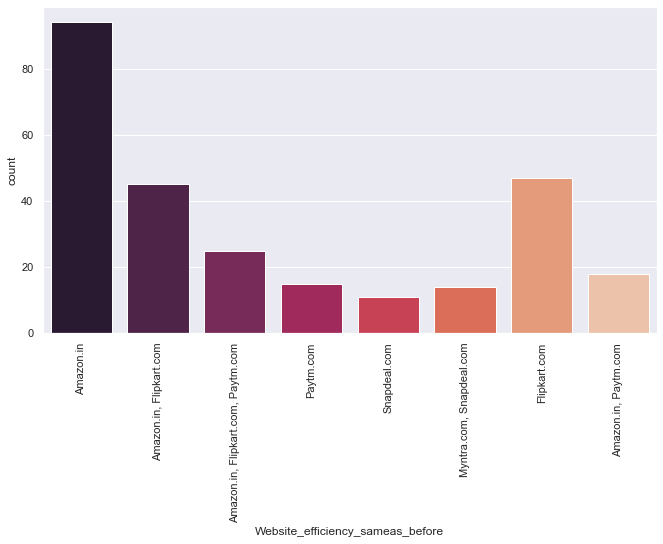

*******************************************************************************************************************************



Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Indian_online_retailer_recommendation, dtype: int64


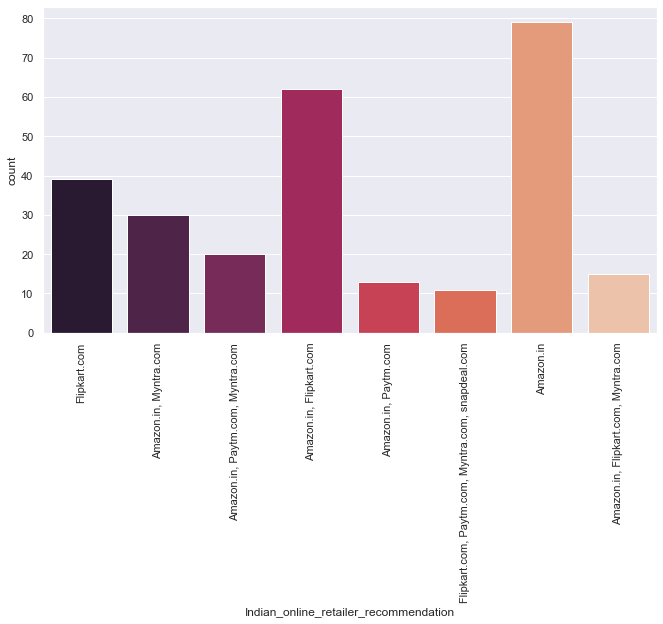

*******************************************************************************************************************************





In [33]:
for col in Customer_Experience_cols:
    print(code_data[col].value_counts())
    plt.figure(figsize = (11,6))
    sns.countplot(x = code_data[col], palette = "rocket")
    plt.xticks(rotation = 90)
    plt.show()
    print("*"*127)
    print("\n\n")

BIVARIATE VIZUALIZATION :

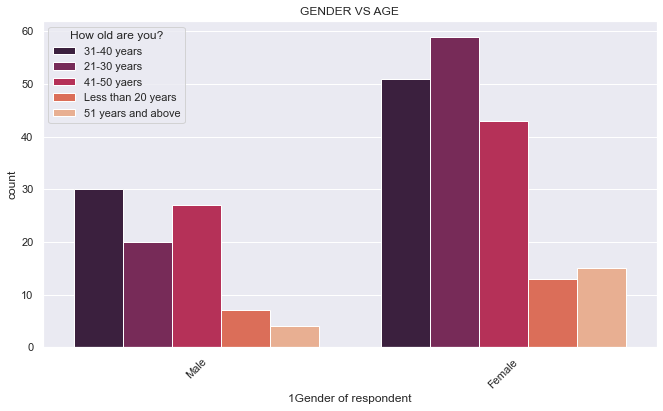

In [34]:
# GENDER VS AGE GROUP:

plt.subplots(figsize=(11,6))
sns.countplot( x = data['1Gender of respondent'], hue = data['How old are you?'], palette ="rocket")
plt.title('GENDER VS AGE')
plt.xticks(rotation=45)
plt.show()

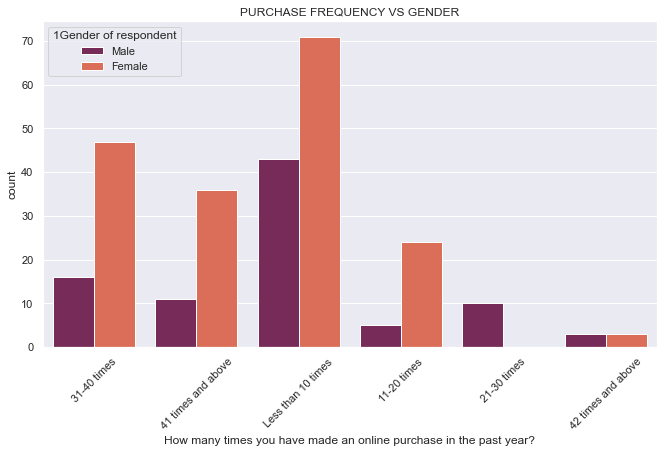

In [35]:
# PURCHASE FREQUENCY IN LAST 1 YEAR DURATION VS GENDER:

plt.subplots(figsize=(11,6))
sns.countplot(x = data['How many times you have made an online purchase in the past year?'], hue = data['1Gender of respondent'], palette ="rocket")
plt.title('PURCHASE FREQUENCY VS GENDER')
plt.xticks(rotation=45)
plt.show()

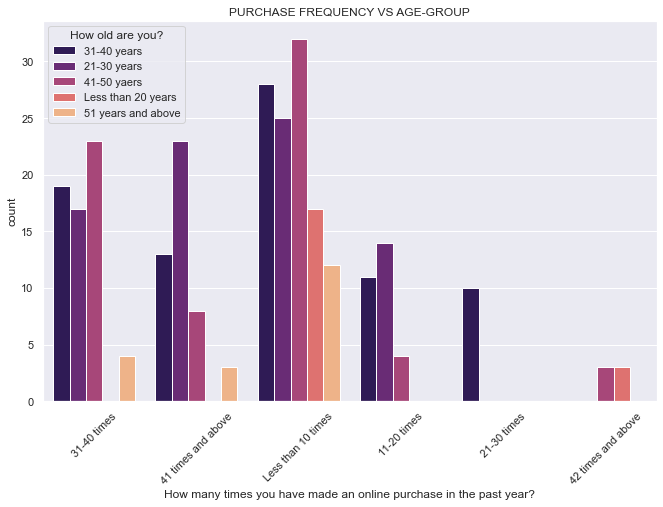

In [36]:
#  PURCHASE FREQUENCY IN LAST 1 YEAR DURATION VS AGE-GROUP:
plt.subplots(figsize=(11,7))
sns.countplot(x = data['How many times you have made an online purchase in the past year?'],hue =data['How old are you?'], palette = "magma")
plt.title('PURCHASE FREQUENCY VS AGE-GROUP')
plt.xticks(rotation=45)
plt.show()

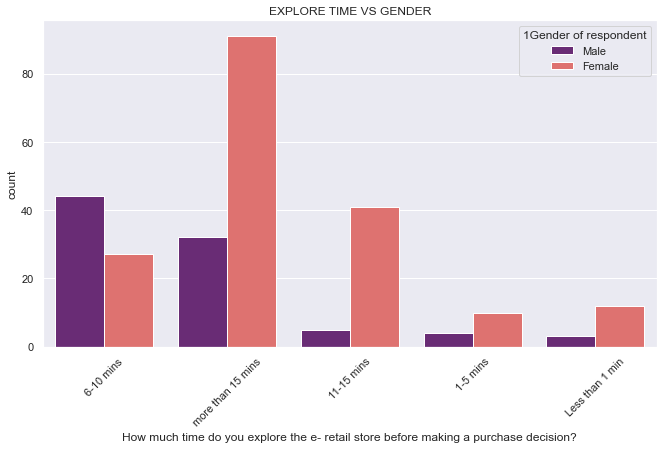

In [37]:
# EXPLORE TIME BEFORE PURCHASE DECISION VS GENDER:

plt.subplots(figsize=(11,6))
sns.countplot(x = data['How much time do you explore the e- retail store before making a purchase decision?'] , hue = data['1Gender of respondent'], palette = "magma")
plt.title('EXPLORE TIME VS GENDER')
plt.xticks(rotation=45)
plt.show()

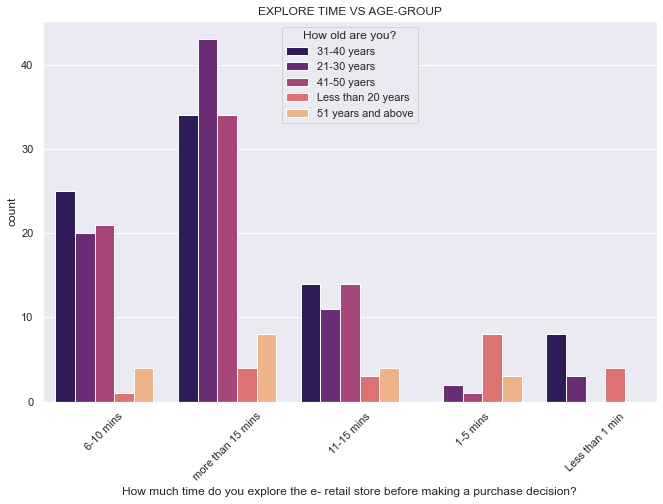

In [38]:
# EXPLORE TIME BEFORE PURCHASE DECISION VS AGE-GROUP:

plt.subplots(figsize=(11,7))
sns.countplot(x = data['How much time do you explore the e- retail store before making a purchase decision?'], hue =data['How old are you?'], palette = "magma")
plt.title('EXPLORE TIME VS AGE-GROUP')
plt.xticks(rotation=45)
plt.show()

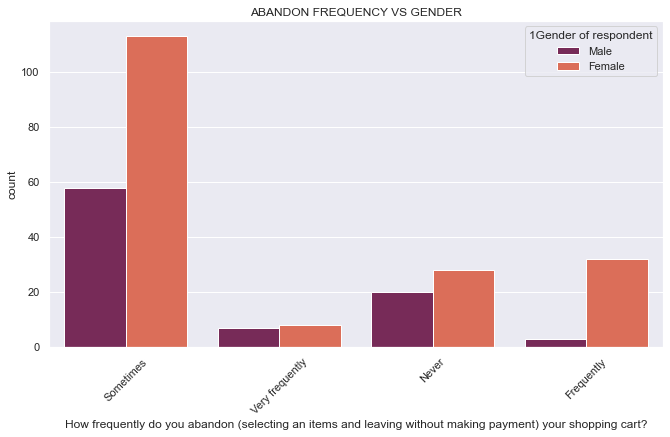

In [39]:
# ABANDON FREQUENCY VS GENDER:

plt.subplots(figsize=(11,6))
sns.countplot(data['How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?'],hue = data['1Gender of respondent'],palette ="rocket")
plt.title('ABANDON FREQUENCY VS GENDER')
plt.xticks(rotation=45)
plt.show()

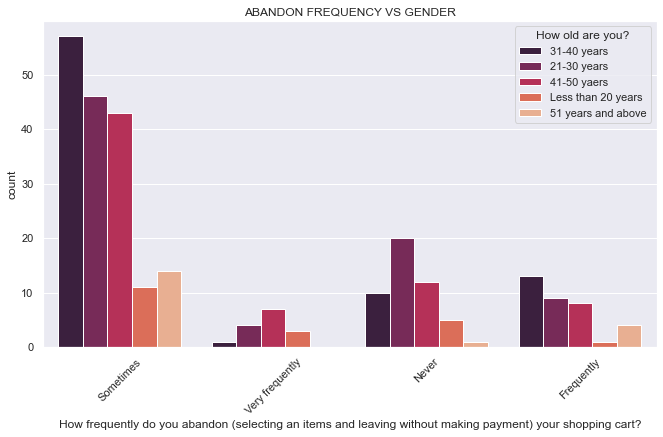

In [40]:
# ABANDON FREQUENCY VS AGE-GROUP:

plt.subplots(figsize=(11,6))
sns.countplot(data['How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?'],hue = data['How old are you?'],palette ="rocket")
plt.title('ABANDON FREQUENCY VS GENDER')
plt.xticks(rotation=45)
plt.show()

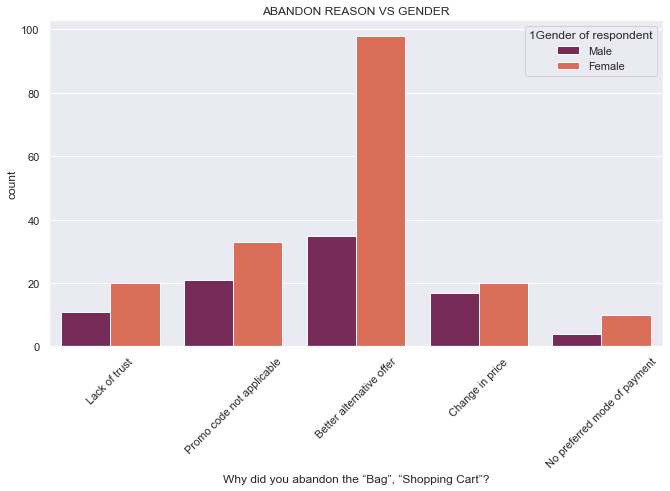

In [41]:
# ABANDON REASON VS GENDER:

plt.subplots(figsize=(11,6))
sns.countplot(data['Why did you abandon the “Bag”, “Shopping Cart”?'],hue = data['1Gender of respondent'],palette ="rocket")
plt.title('ABANDON REASON VS GENDER')
plt.xticks(rotation=45)
plt.show()

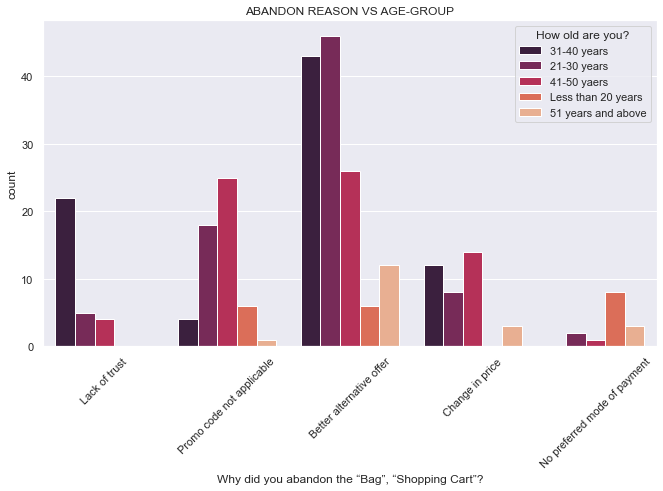

In [42]:
# ABANDON REASON VS AGE-GROUP:

plt.subplots(figsize=(11,6))
sns.countplot(data['Why did you abandon the “Bag”, “Shopping Cart”?'],hue = data['How old are you?'],palette ="rocket")
plt.title('ABANDON REASON VS AGE-GROUP')
plt.xticks(rotation=45)
plt.show()

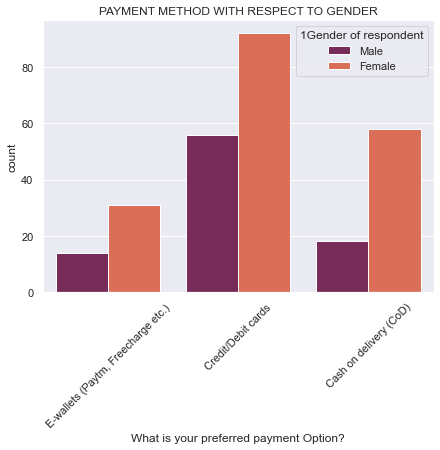

In [43]:
# PAYMENT METHOD WITH RESPECT TO GENDER:

plt.subplots(figsize=(7,5))
sns.countplot(data['What is your preferred payment Option?'],hue = data['1Gender of respondent'],palette ="rocket")
plt.title('PAYMENT METHOD WITH RESPECT TO GENDER')
plt.xticks(rotation=45)
plt.show()

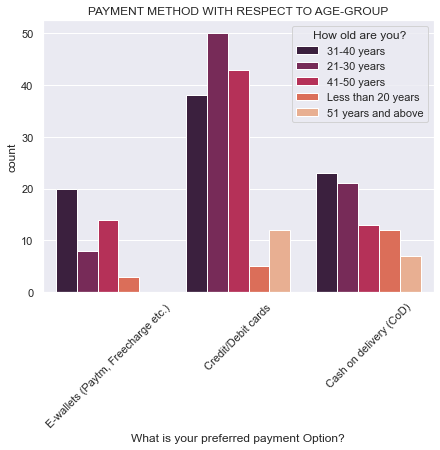

In [44]:
# PAYMENT METHOD WITH RESPECT TO AGE-GROUP:

plt.subplots(figsize=(7,5))
sns.countplot(data['What is your preferred payment Option?'],hue = data['How old are you?'],palette ="rocket")
plt.title('PAYMENT METHOD WITH RESPECT TO AGE-GROUP')
plt.xticks(rotation=45)
plt.show()

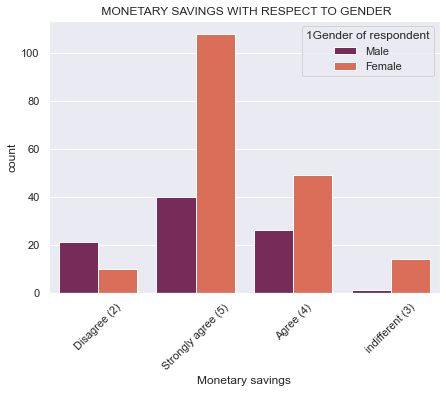

In [45]:
# IMPORTANCE OF MONETARY SAVINGS WITH RESPECT TO GENDER:

plt.subplots(figsize=(7,5))
sns.countplot(data['Monetary savings'],hue = data['1Gender of respondent'],palette ="rocket")
plt.title(' MONETARY SAVINGS WITH RESPECT TO GENDER')
plt.xticks(rotation=45)
plt.show()

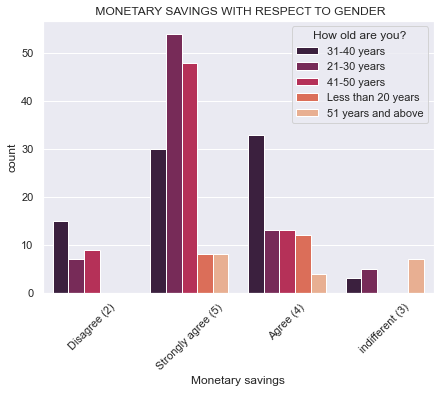

In [46]:
# IMPORTANCE OF MONETARY SAVINGS WITH RESPECT TO AGE-GROUP:

plt.subplots(figsize=(7,5))
sns.countplot(data['Monetary savings'],hue = data['How old are you?'],palette ="rocket")
plt.title(' MONETARY SAVINGS WITH RESPECT TO GENDER')
plt.xticks(rotation=45)
plt.show()

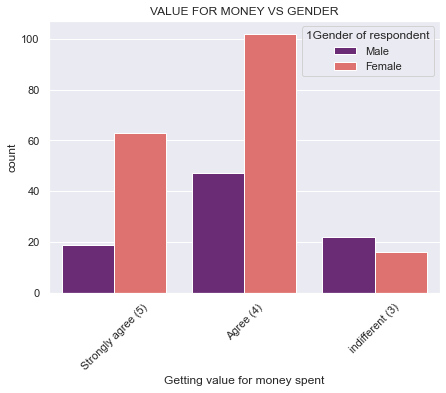

In [47]:
# VALUE FOR MONEY VS GENDER:

plt.subplots(figsize=(7,5))
sns.countplot(data['Getting value for money spent'],hue = data['1Gender of respondent'],palette ="magma")
plt.title('VALUE FOR MONEY VS GENDER')
plt.xticks(rotation=45)
plt.show()

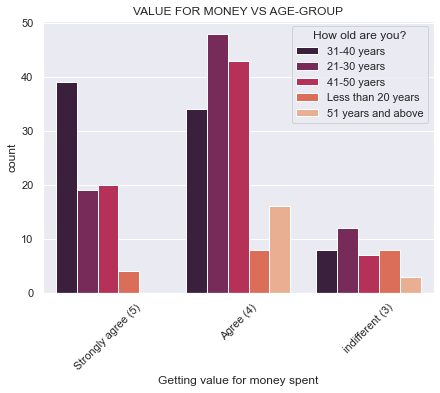

In [48]:
# VALUE FOR MONEY VS AGE-GROUP:

plt.subplots(figsize=(7,5))
sns.countplot(data['Getting value for money spent'],hue = data['How old are you?'],palette ="rocket")
plt.title('VALUE FOR MONEY VS AGE-GROUP')
plt.xticks(rotation=45)
plt.show()

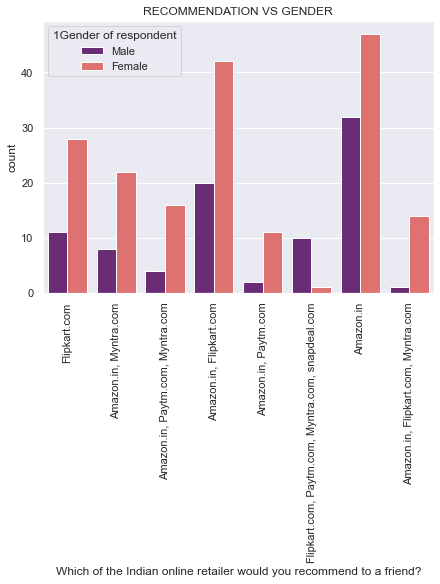

In [49]:
# RECOMMENDATION VS GENDER:

plt.subplots(figsize=(7,5))
sns.countplot(data['Which of the Indian online retailer would you recommend to a friend?'],hue = data['1Gender of respondent'],palette ="magma")
plt.title('RECOMMENDATION VS GENDER')
plt.xticks(rotation=90)
plt.show()

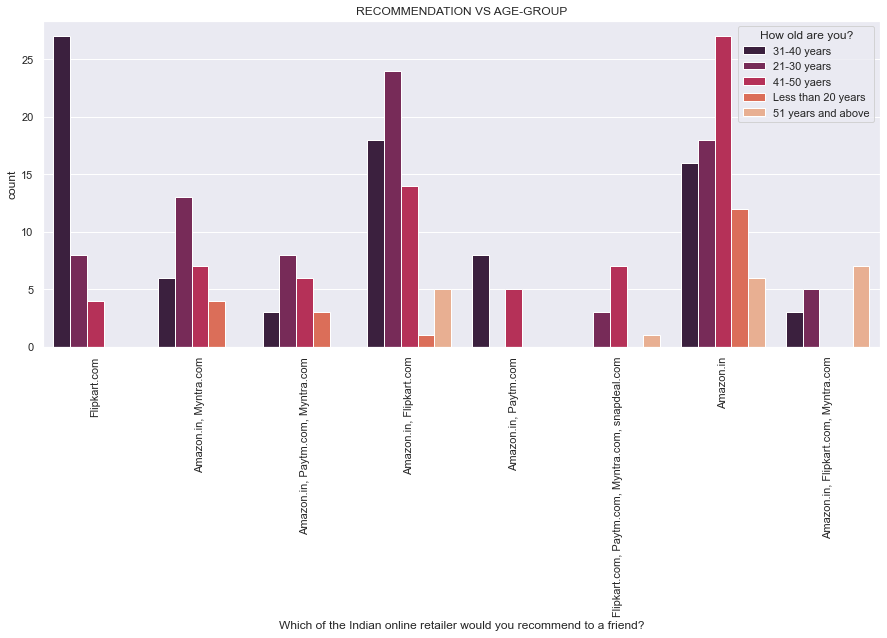

In [50]:
# RECOMMENDATION VS AGE-GROUP:

plt.subplots(figsize=(15,6))
sns.countplot(data['Which of the Indian online retailer would you recommend to a friend?'],hue = data['How old are you?'],palette ="rocket")
plt.title('RECOMMENDATION VS AGE-GROUP')
plt.xticks(rotation=90)
plt.show()

MULTIVARIATE ANALYSIS:

For further analysis we should check for the independency of facotrs or we can say that multicollinearity between the columns of the dataset.
For Model fitting, collinearity should not be there in the dataset under study. If it exists, it should be removed by treating statistically the dataset. 

In [51]:
## List of all possible combinations of columns of the dataset:

columnCobination = [i for i in list(product(code_data, code_data)) if i[0] != i[1]]

In [52]:
# Function finding relationship within the categorical columns:


def chi2IndependenceTest(col1, col2):
    
    crossTab = pd.crosstab(code_data[col1], code_data[col2], margins=True, margins_name='Total')
    observed_val = crossTab.values
    expected_val = stats.chi2_contingency(crossTab)[3]
    row_Num = (crossTab.shape[0] - 1)
    column_Num = (crossTab.shape[1] - 1)
    degree_of_freedom = (row_Num-1)*(column_Num-1)
    chiSquare = sum([(o-e)**2./e for o,e in zip(observed_val, expected_val)])
    chiSquareStatistic = chiSquare[0] + chiSquare[1]
    p_Value = 1-stats.chi2.cdf(x = chiSquareStatistic, df = degree_of_freedom)
    
    return degree_of_freedom, p_Value

In [53]:
#Performing chi-square test of independence on each pair of columnCobination and appeding all significant column pairs 
#to a new list (significantCombo)

significantCombo = list()

for combo in columnCobination:
    d, p = chi2IndependenceTest(combo[0], combo[1])
    if p < 0.01:
        print(f'{combo[0]} and {combo[1]} have significant relationship\n')
        significantCombo.append(combo)

Gender and Internet_type have significant relationship

Gender and Suit_pay_method have significant relationship

Gender and Shop_benefits have significant relationship

Gender and Access_loyalty_progm have significant relationship

Gender and Display_info_satisfaction have significant relationship

Gender and Website_User_satisfaction have significant relationship

Gender and Net_benefit_user_satisfaction have significant relationship

Gender and Complete_prod_info have significant relationship

Gender and Monetary_savings have significant relationship

Gender and Patronizing_retailor_convenience have significant relationship

Gender and Shop_OL_adventurous have significant relationship

Gender and Value_for_money have significant relationship

Age and Device have significant relationship

Age and Path_next_visit have significant relationship

Age and Explore_time have significant relationship

Age and Content_read_understand have significant relationship

Age and Info_for_product_com

Device and Info_for_product_comparison have significant relationship

Device and Info_seller_product have significant relationship

Device and prod_info_clear have significant relationship

Device and Ease_nav have significant relationship

Device and Loading_speed have significant relationship

Device and User_friendly_interface have significant relationship

Device and Suit_pay_method have significant relationship

Device and Trust_transact_time have significant relationship

Device and Cust_Empathy have significant relationship

Device and Cust_privacy have significant relationship

Device and Response_behaviour have significant relationship

Device and Shop_benefits have significant relationship

Device and Enjoy_derived have significant relationship

Device and Shop_online_convenient have significant relationship

Device and Return_policy have significant relationship

Device and Access_loyalty_progm have significant relationship

Device and Display_info_satisfaction have signific

Dev_OS and Trust_satisfy_user have significant relationship

Dev_OS and Wide_variety_product have significant relationship

Dev_OS and Complete_prod_info have significant relationship

Dev_OS and Monetary_savings have significant relationship

Dev_OS and Shop_OL_adventurous have significant relationship

Dev_OS and Shop_OL_Enhance_SocialStatus have significant relationship

Dev_OS and Feel_gratification have significant relationship

Dev_OS and Shop_OL_fulfil_roles have significant relationship

Dev_OS and Value_for_money have significant relationship

Dev_OS and From the following, tick any (or all) of the online retailers you have shopped from; have significant relationship

Dev_OS and Easy_use_website have significant relationship

Dev_OS and Wepage_visual_appeal have significant relationship

Dev_OS and Wide_variety_prod_offer have significant relationship

Dev_OS and Complete_prod_description have significant relationship

Dev_OS and Fast_loading_speed have significant relationshi

Path_next_visit and Suit_pay_method have significant relationship

Path_next_visit and Trust_transact_time have significant relationship

Path_next_visit and Cust_Empathy have significant relationship

Path_next_visit and Cust_privacy have significant relationship

Path_next_visit and Response_behaviour have significant relationship

Path_next_visit and Shop_benefits have significant relationship

Path_next_visit and Enjoy_derived have significant relationship

Path_next_visit and Shop_online_convenient have significant relationship

Path_next_visit and Return_policy have significant relationship

Path_next_visit and Access_loyalty_progm have significant relationship

Path_next_visit and Display_info_satisfaction have significant relationship

Path_next_visit and Website_User_satisfaction have significant relationship

Path_next_visit and Net_benefit_user_satisfaction have significant relationship

Path_next_visit and Trust_satisfy_user have significant relationship

Path_next_visit an

Pay_option and Website_User_satisfaction have significant relationship

Pay_option and Net_benefit_user_satisfaction have significant relationship

Pay_option and Trust_satisfy_user have significant relationship

Pay_option and Wide_variety_product have significant relationship

Pay_option and Complete_prod_info have significant relationship

Pay_option and Monetary_savings have significant relationship

Pay_option and Shop_OL_adventurous have significant relationship

Pay_option and Shop_OL_Enhance_SocialStatus have significant relationship

Pay_option and Feel_gratification have significant relationship

Pay_option and Shop_OL_fulfil_roles have significant relationship

Pay_option and Value_for_money have significant relationship

Pay_option and From the following, tick any (or all) of the online retailers you have shopped from; have significant relationship

Pay_option and Easy_use_website have significant relationship

Pay_option and Wepage_visual_appeal have significant relationsh

Abandon_reason and Fast_loading_speed have significant relationship

Abandon_reason and Website_reliability have significant relationship

Abandon_reason and Purchase_completion_speed have significant relationship

Abandon_reason and Customer_info_privacy have significant relationship

Abandon_reason and Secure_cust_financial_info have significant relationship

Abandon_reason and Perceived_Trustworthiness have significant relationship

Abandon_reason and Online_assistance_presence have significant relationship

Abandon_reason and Long_time_taken_logingin have significant relationship

Abandon_reason and Long_time_displaying_graphics have significant relationship

Abandon_reason and Late_price_declaration have significant relationship

Abandon_reason and Longer_pageloading_time have significant relationship

Abandon_reason and Limited_payment_modes have significant relationship

Abandon_reason and Longer_delivery_period have significant relationship

Abandon_reason and Changed_website_d

Info_for_product_comparison and Shop_OL_Enhance_SocialStatus have significant relationship

Info_for_product_comparison and Feel_gratification have significant relationship

Info_for_product_comparison and Shop_OL_fulfil_roles have significant relationship

Info_for_product_comparison and Value_for_money have significant relationship

Info_for_product_comparison and Easy_use_website have significant relationship

Info_for_product_comparison and Wepage_visual_appeal have significant relationship

Info_for_product_comparison and Complete_prod_description have significant relationship

Info_for_product_comparison and Fast_loading_speed have significant relationship

Info_for_product_comparison and Website_reliability have significant relationship

Info_for_product_comparison and Purchase_completion_speed have significant relationship

Info_for_product_comparison and Payment_options_availability have significant relationship

Info_for_product_comparison and Fast_delivery_speed have signifi

prod_info_clear and Return_policy have significant relationship

prod_info_clear and Access_loyalty_progm have significant relationship

prod_info_clear and Display_info_satisfaction have significant relationship

prod_info_clear and Website_User_satisfaction have significant relationship

prod_info_clear and Net_benefit_user_satisfaction have significant relationship

prod_info_clear and Trust_satisfy_user have significant relationship

prod_info_clear and Wide_variety_product have significant relationship

prod_info_clear and Complete_prod_info have significant relationship

prod_info_clear and Monetary_savings have significant relationship

prod_info_clear and Patronizing_retailor_convenience have significant relationship

prod_info_clear and Shop_OL_adventurous have significant relationship

prod_info_clear and Shop_OL_Enhance_SocialStatus have significant relationship

prod_info_clear and Feel_gratification have significant relationship

prod_info_clear and Shop_OL_fulfil_roles ha

Loading_speed and Net_benefit_user_satisfaction have significant relationship

Loading_speed and Trust_satisfy_user have significant relationship

Loading_speed and Wide_variety_product have significant relationship

Loading_speed and Complete_prod_info have significant relationship

Loading_speed and Monetary_savings have significant relationship

Loading_speed and Patronizing_retailor_convenience have significant relationship

Loading_speed and Shop_OL_adventurous have significant relationship

Loading_speed and Shop_OL_Enhance_SocialStatus have significant relationship

Loading_speed and Feel_gratification have significant relationship

Loading_speed and Shop_OL_fulfil_roles have significant relationship

Loading_speed and Value_for_money have significant relationship

Loading_speed and Easy_use_website have significant relationship

Loading_speed and Wepage_visual_appeal have significant relationship

Loading_speed and Complete_prod_description have significant relationship

Loadin

Suit_pay_method and Response_behaviour have significant relationship

Suit_pay_method and Shop_benefits have significant relationship

Suit_pay_method and Enjoy_derived have significant relationship

Suit_pay_method and Shop_online_convenient have significant relationship

Suit_pay_method and Return_policy have significant relationship

Suit_pay_method and Access_loyalty_progm have significant relationship

Suit_pay_method and Display_info_satisfaction have significant relationship

Suit_pay_method and Website_User_satisfaction have significant relationship

Suit_pay_method and Net_benefit_user_satisfaction have significant relationship

Suit_pay_method and Trust_satisfy_user have significant relationship

Suit_pay_method and Wide_variety_product have significant relationship

Suit_pay_method and Complete_prod_info have significant relationship

Suit_pay_method and Monetary_savings have significant relationship

Suit_pay_method and Patronizing_retailor_convenience have significant rela

Cust_Empathy and Access_loyalty_progm have significant relationship

Cust_Empathy and Display_info_satisfaction have significant relationship

Cust_Empathy and Website_User_satisfaction have significant relationship

Cust_Empathy and Net_benefit_user_satisfaction have significant relationship

Cust_Empathy and Trust_satisfy_user have significant relationship

Cust_Empathy and Wide_variety_product have significant relationship

Cust_Empathy and Complete_prod_info have significant relationship

Cust_Empathy and Monetary_savings have significant relationship

Cust_Empathy and Patronizing_retailor_convenience have significant relationship

Cust_Empathy and Shop_OL_adventurous have significant relationship

Cust_Empathy and Shop_OL_Enhance_SocialStatus have significant relationship

Cust_Empathy and Feel_gratification have significant relationship

Cust_Empathy and Shop_OL_fulfil_roles have significant relationship

Cust_Empathy and Value_for_money have significant relationship

Cust_Empath

Response_behaviour and Shop_OL_adventurous have significant relationship

Response_behaviour and Shop_OL_Enhance_SocialStatus have significant relationship

Response_behaviour and Feel_gratification have significant relationship

Response_behaviour and Shop_OL_fulfil_roles have significant relationship

Response_behaviour and Value_for_money have significant relationship

Response_behaviour and Wepage_visual_appeal have significant relationship

Response_behaviour and Fast_loading_speed have significant relationship

Response_behaviour and Website_reliability have significant relationship

Response_behaviour and Purchase_completion_speed have significant relationship

Response_behaviour and Payment_options_availability have significant relationship

Response_behaviour and Fast_delivery_speed have significant relationship

Response_behaviour and Customer_info_privacy have significant relationship

Response_behaviour and Secure_cust_financial_info have significant relationship

Response_

Enjoy_derived and Wepage_visual_appeal have significant relationship

Enjoy_derived and Wide_variety_prod_offer have significant relationship

Enjoy_derived and Complete_prod_description have significant relationship

Enjoy_derived and Fast_loading_speed have significant relationship

Enjoy_derived and Website_reliability have significant relationship

Enjoy_derived and Purchase_completion_speed have significant relationship

Enjoy_derived and Payment_options_availability have significant relationship

Enjoy_derived and Fast_delivery_speed have significant relationship

Enjoy_derived and Customer_info_privacy have significant relationship

Enjoy_derived and Secure_cust_financial_info have significant relationship

Enjoy_derived and Perceived_Trustworthiness have significant relationship

Enjoy_derived and Online_assistance_presence have significant relationship

Enjoy_derived and Long_time_taken_logingin have significant relationship

Enjoy_derived and Long_time_displaying_graphics hav

Return_policy and Website_efficiency_sameas_before have significant relationship

Return_policy and Indian_online_retailer_recommendation have significant relationship

Access_loyalty_progm and Gender have significant relationship

Access_loyalty_progm and Num_shop have significant relationship

Access_loyalty_progm and Device have significant relationship

Access_loyalty_progm and DScreen_size have significant relationship

Access_loyalty_progm and Dev_OS have significant relationship

Access_loyalty_progm and Browser have significant relationship

Access_loyalty_progm and Channel have significant relationship

Access_loyalty_progm and Path_next_visit have significant relationship

Access_loyalty_progm and Explore_time have significant relationship

Access_loyalty_progm and Pay_option have significant relationship

Access_loyalty_progm and Abandon_freq have significant relationship

Access_loyalty_progm and Abandon_reason have significant relationship

Access_loyalty_progm and Content

Website_User_satisfaction and Path_next_visit have significant relationship

Website_User_satisfaction and Pay_option have significant relationship

Website_User_satisfaction and Abandon_freq have significant relationship

Website_User_satisfaction and Ease_nav have significant relationship

Website_User_satisfaction and Suit_pay_method have significant relationship

Website_User_satisfaction and Trust_transact_time have significant relationship

Website_User_satisfaction and Cust_privacy have significant relationship

Website_User_satisfaction and Shop_benefits have significant relationship

Website_User_satisfaction and Enjoy_derived have significant relationship

Website_User_satisfaction and Shop_online_convenient have significant relationship

Website_User_satisfaction and Return_policy have significant relationship

Website_User_satisfaction and Access_loyalty_progm have significant relationship

Website_User_satisfaction and Display_info_satisfaction have significant relationshi

Trust_satisfy_user and Abandon_freq have significant relationship

Trust_satisfy_user and Abandon_reason have significant relationship

Trust_satisfy_user and Content_read_understand have significant relationship

Trust_satisfy_user and Info_for_product_comparison have significant relationship

Trust_satisfy_user and Info_seller_product have significant relationship

Trust_satisfy_user and prod_info_clear have significant relationship

Trust_satisfy_user and Ease_nav have significant relationship

Trust_satisfy_user and Loading_speed have significant relationship

Trust_satisfy_user and User_friendly_interface have significant relationship

Trust_satisfy_user and Suit_pay_method have significant relationship

Trust_satisfy_user and Trust_transact_time have significant relationship

Trust_satisfy_user and Cust_Empathy have significant relationship

Trust_satisfy_user and Cust_privacy have significant relationship

Trust_satisfy_user and Response_behaviour have significant relationship



Complete_prod_info and Channel have significant relationship

Complete_prod_info and Path_next_visit have significant relationship

Complete_prod_info and Explore_time have significant relationship

Complete_prod_info and Pay_option have significant relationship

Complete_prod_info and Abandon_freq have significant relationship

Complete_prod_info and Content_read_understand have significant relationship

Complete_prod_info and Info_for_product_comparison have significant relationship

Complete_prod_info and Info_seller_product have significant relationship

Complete_prod_info and prod_info_clear have significant relationship

Complete_prod_info and Ease_nav have significant relationship

Complete_prod_info and Loading_speed have significant relationship

Complete_prod_info and User_friendly_interface have significant relationship

Complete_prod_info and Suit_pay_method have significant relationship

Complete_prod_info and Trust_transact_time have significant relationship

Complete_pro

Patronizing_retailor_convenience and Info_seller_product have significant relationship

Patronizing_retailor_convenience and prod_info_clear have significant relationship

Patronizing_retailor_convenience and Ease_nav have significant relationship

Patronizing_retailor_convenience and Loading_speed have significant relationship

Patronizing_retailor_convenience and User_friendly_interface have significant relationship

Patronizing_retailor_convenience and Suit_pay_method have significant relationship

Patronizing_retailor_convenience and Trust_transact_time have significant relationship

Patronizing_retailor_convenience and Cust_Empathy have significant relationship

Patronizing_retailor_convenience and Cust_privacy have significant relationship

Patronizing_retailor_convenience and Response_behaviour have significant relationship

Patronizing_retailor_convenience and Shop_benefits have significant relationship

Patronizing_retailor_convenience and Enjoy_derived have significant relati

Shop_OL_adventurous and Changed_website_design have significant relationship

Shop_OL_adventurous and Disrupted_page_movement have significant relationship

Shop_OL_adventurous and Website_efficiency_sameas_before have significant relationship

Shop_OL_adventurous and Indian_online_retailer_recommendation have significant relationship

Shop_OL_Enhance_SocialStatus and Device have significant relationship

Shop_OL_Enhance_SocialStatus and DScreen_size have significant relationship

Shop_OL_Enhance_SocialStatus and Dev_OS have significant relationship

Shop_OL_Enhance_SocialStatus and Browser have significant relationship

Shop_OL_Enhance_SocialStatus and Channel have significant relationship

Shop_OL_Enhance_SocialStatus and Path_next_visit have significant relationship

Shop_OL_Enhance_SocialStatus and Explore_time have significant relationship

Shop_OL_Enhance_SocialStatus and Pay_option have significant relationship

Shop_OL_Enhance_SocialStatus and Abandon_freq have significant rela

Feel_gratification and Purchase_completion_speed have significant relationship

Feel_gratification and Payment_options_availability have significant relationship

Feel_gratification and Fast_delivery_speed have significant relationship

Feel_gratification and Perceived_Trustworthiness have significant relationship

Feel_gratification and Online_assistance_presence have significant relationship

Feel_gratification and Long_time_taken_logingin have significant relationship

Feel_gratification and Long_time_displaying_graphics have significant relationship

Feel_gratification and Longer_pageloading_time have significant relationship

Feel_gratification and Limited_payment_modes have significant relationship

Feel_gratification and Longer_delivery_period have significant relationship

Feel_gratification and Changed_website_design have significant relationship

Feel_gratification and Disrupted_page_movement have significant relationship

Feel_gratification and Website_efficiency_sameas_befo

Value_for_money and Easy_use_website have significant relationship

Value_for_money and Wide_variety_prod_offer have significant relationship

Value_for_money and Payment_options_availability have significant relationship

Value_for_money and Perceived_Trustworthiness have significant relationship

Value_for_money and Online_assistance_presence have significant relationship

Value_for_money and Long_time_displaying_graphics have significant relationship

Value_for_money and Late_price_declaration have significant relationship

Value_for_money and Longer_pageloading_time have significant relationship

Value_for_money and Limited_payment_modes have significant relationship

Value_for_money and Longer_delivery_period have significant relationship

Value_for_money and Changed_website_design have significant relationship

Value_for_money and Indian_online_retailer_recommendation have significant relationship

From the following, tick any (or all) of the online retailers you have shopped fro

From the following, tick any (or all) of the online retailers you have shopped from; and Secure_cust_financial_info have significant relationship

From the following, tick any (or all) of the online retailers you have shopped from; and Perceived_Trustworthiness have significant relationship

From the following, tick any (or all) of the online retailers you have shopped from; and Online_assistance_presence have significant relationship

From the following, tick any (or all) of the online retailers you have shopped from; and Long_time_taken_logingin have significant relationship

From the following, tick any (or all) of the online retailers you have shopped from; and Long_time_displaying_graphics have significant relationship

From the following, tick any (or all) of the online retailers you have shopped from; and Late_price_declaration have significant relationship

From the following, tick any (or all) of the online retailers you have shopped from; and Longer_pageloading_time have sign

Wepage_visual_appeal and Cust_Empathy have significant relationship

Wepage_visual_appeal and Cust_privacy have significant relationship

Wepage_visual_appeal and Response_behaviour have significant relationship

Wepage_visual_appeal and Shop_benefits have significant relationship

Wepage_visual_appeal and Enjoy_derived have significant relationship

Wepage_visual_appeal and Shop_online_convenient have significant relationship

Wepage_visual_appeal and Return_policy have significant relationship

Wepage_visual_appeal and Access_loyalty_progm have significant relationship

Wepage_visual_appeal and Display_info_satisfaction have significant relationship

Wepage_visual_appeal and Website_User_satisfaction have significant relationship

Wepage_visual_appeal and Net_benefit_user_satisfaction have significant relationship

Wepage_visual_appeal and Trust_satisfy_user have significant relationship

Wepage_visual_appeal and Wide_variety_product have significant relationship

Wepage_visual_appea

Complete_prod_description and Channel have significant relationship

Complete_prod_description and Path_next_visit have significant relationship

Complete_prod_description and Explore_time have significant relationship

Complete_prod_description and Pay_option have significant relationship

Complete_prod_description and Abandon_freq have significant relationship

Complete_prod_description and Abandon_reason have significant relationship

Complete_prod_description and Info_for_product_comparison have significant relationship

Complete_prod_description and Loading_speed have significant relationship

Complete_prod_description and User_friendly_interface have significant relationship

Complete_prod_description and Suit_pay_method have significant relationship

Complete_prod_description and Trust_transact_time have significant relationship

Complete_prod_description and Cust_Empathy have significant relationship

Complete_prod_description and Cust_privacy have significant relationship

Com

Fast_loading_speed and Longer_pageloading_time have significant relationship

Fast_loading_speed and Limited_payment_modes have significant relationship

Fast_loading_speed and Longer_delivery_period have significant relationship

Fast_loading_speed and Changed_website_design have significant relationship

Fast_loading_speed and Disrupted_page_movement have significant relationship

Fast_loading_speed and Website_efficiency_sameas_before have significant relationship

Fast_loading_speed and Indian_online_retailer_recommendation have significant relationship

Website_reliability and Gender have significant relationship

Website_reliability and Age have significant relationship

Website_reliability and Internet_type have significant relationship

Website_reliability and Device have significant relationship

Website_reliability and DScreen_size have significant relationship

Website_reliability and Dev_OS have significant relationship

Website_reliability and Browser have significant rela

Purchase_completion_speed and Patronizing_retailor_convenience have significant relationship

Purchase_completion_speed and Shop_OL_adventurous have significant relationship

Purchase_completion_speed and Shop_OL_Enhance_SocialStatus have significant relationship

Purchase_completion_speed and Feel_gratification have significant relationship

Purchase_completion_speed and Shop_OL_fulfil_roles have significant relationship

Purchase_completion_speed and Value_for_money have significant relationship

Purchase_completion_speed and From the following, tick any (or all) of the online retailers you have shopped from; have significant relationship

Purchase_completion_speed and Easy_use_website have significant relationship

Purchase_completion_speed and Wepage_visual_appeal have significant relationship

Purchase_completion_speed and Wide_variety_prod_offer have significant relationship

Purchase_completion_speed and Complete_prod_description have significant relationship

Purchase_completio

Fast_delivery_speed and Device have significant relationship

Fast_delivery_speed and DScreen_size have significant relationship

Fast_delivery_speed and Dev_OS have significant relationship

Fast_delivery_speed and Browser have significant relationship

Fast_delivery_speed and Channel have significant relationship

Fast_delivery_speed and Path_next_visit have significant relationship

Fast_delivery_speed and Explore_time have significant relationship

Fast_delivery_speed and Pay_option have significant relationship

Fast_delivery_speed and Abandon_freq have significant relationship

Fast_delivery_speed and Abandon_reason have significant relationship

Fast_delivery_speed and Content_read_understand have significant relationship

Fast_delivery_speed and Info_for_product_comparison have significant relationship

Fast_delivery_speed and Info_seller_product have significant relationship

Fast_delivery_speed and prod_info_clear have significant relationship

Fast_delivery_speed and Ease_na

Customer_info_privacy and Complete_prod_description have significant relationship

Customer_info_privacy and Fast_loading_speed have significant relationship

Customer_info_privacy and Website_reliability have significant relationship

Customer_info_privacy and Purchase_completion_speed have significant relationship

Customer_info_privacy and Payment_options_availability have significant relationship

Customer_info_privacy and Fast_delivery_speed have significant relationship

Customer_info_privacy and Secure_cust_financial_info have significant relationship

Customer_info_privacy and Perceived_Trustworthiness have significant relationship

Customer_info_privacy and Online_assistance_presence have significant relationship

Customer_info_privacy and Long_time_taken_logingin have significant relationship

Customer_info_privacy and Long_time_displaying_graphics have significant relationship

Customer_info_privacy and Late_price_declaration have significant relationship

Customer_info_priv

Perceived_Trustworthiness and prod_info_clear have significant relationship

Perceived_Trustworthiness and Ease_nav have significant relationship

Perceived_Trustworthiness and Loading_speed have significant relationship

Perceived_Trustworthiness and User_friendly_interface have significant relationship

Perceived_Trustworthiness and Suit_pay_method have significant relationship

Perceived_Trustworthiness and Trust_transact_time have significant relationship

Perceived_Trustworthiness and Cust_Empathy have significant relationship

Perceived_Trustworthiness and Cust_privacy have significant relationship

Perceived_Trustworthiness and Response_behaviour have significant relationship

Perceived_Trustworthiness and Shop_benefits have significant relationship

Perceived_Trustworthiness and Enjoy_derived have significant relationship

Perceived_Trustworthiness and Shop_online_convenient have significant relationship

Perceived_Trustworthiness and Return_policy have significant relationship

Online_assistance_presence and Customer_info_privacy have significant relationship

Online_assistance_presence and Secure_cust_financial_info have significant relationship

Online_assistance_presence and Perceived_Trustworthiness have significant relationship

Online_assistance_presence and Long_time_taken_logingin have significant relationship

Online_assistance_presence and Long_time_displaying_graphics have significant relationship

Online_assistance_presence and Limited_payment_modes have significant relationship

Online_assistance_presence and Longer_delivery_period have significant relationship

Online_assistance_presence and Changed_website_design have significant relationship

Online_assistance_presence and Disrupted_page_movement have significant relationship

Online_assistance_presence and Website_efficiency_sameas_before have significant relationship

Online_assistance_presence and Indian_online_retailer_recommendation have significant relationship

Long_time_taken_logingin 

Long_time_displaying_graphics and Shop_online_convenient have significant relationship

Long_time_displaying_graphics and Return_policy have significant relationship

Long_time_displaying_graphics and Access_loyalty_progm have significant relationship

Long_time_displaying_graphics and Display_info_satisfaction have significant relationship

Long_time_displaying_graphics and Website_User_satisfaction have significant relationship

Long_time_displaying_graphics and Net_benefit_user_satisfaction have significant relationship

Long_time_displaying_graphics and Trust_satisfy_user have significant relationship

Long_time_displaying_graphics and Wide_variety_product have significant relationship

Long_time_displaying_graphics and Complete_prod_info have significant relationship

Long_time_displaying_graphics and Monetary_savings have significant relationship

Long_time_displaying_graphics and Patronizing_retailor_convenience have significant relationship

Long_time_displaying_graphics and Sh

Late_price_declaration and Disrupted_page_movement have significant relationship

Late_price_declaration and Website_efficiency_sameas_before have significant relationship

Late_price_declaration and Indian_online_retailer_recommendation have significant relationship

Longer_pageloading_time and Gender have significant relationship

Longer_pageloading_time and Age have significant relationship

Longer_pageloading_time and Online_rel have significant relationship

Longer_pageloading_time and Device have significant relationship

Longer_pageloading_time and DScreen_size have significant relationship

Longer_pageloading_time and Dev_OS have significant relationship

Longer_pageloading_time and Browser have significant relationship

Longer_pageloading_time and Channel have significant relationship

Longer_pageloading_time and Path_next_visit have significant relationship

Longer_pageloading_time and Explore_time have significant relationship

Longer_pageloading_time and Pay_option have sig

Limited_payment_modes and Shop_OL_adventurous have significant relationship

Limited_payment_modes and Shop_OL_Enhance_SocialStatus have significant relationship

Limited_payment_modes and Feel_gratification have significant relationship

Limited_payment_modes and Shop_OL_fulfil_roles have significant relationship

Limited_payment_modes and Value_for_money have significant relationship

Limited_payment_modes and From the following, tick any (or all) of the online retailers you have shopped from; have significant relationship

Limited_payment_modes and Wepage_visual_appeal have significant relationship

Limited_payment_modes and Wide_variety_prod_offer have significant relationship

Limited_payment_modes and Complete_prod_description have significant relationship

Limited_payment_modes and Website_reliability have significant relationship

Limited_payment_modes and Purchase_completion_speed have significant relationship

Limited_payment_modes and Payment_options_availability have signif

Changed_website_design and Ease_nav have significant relationship

Changed_website_design and Loading_speed have significant relationship

Changed_website_design and User_friendly_interface have significant relationship

Changed_website_design and Suit_pay_method have significant relationship

Changed_website_design and Trust_transact_time have significant relationship

Changed_website_design and Cust_Empathy have significant relationship

Changed_website_design and Cust_privacy have significant relationship

Changed_website_design and Response_behaviour have significant relationship

Changed_website_design and Shop_benefits have significant relationship

Changed_website_design and Enjoy_derived have significant relationship

Changed_website_design and Shop_online_convenient have significant relationship

Changed_website_design and Return_policy have significant relationship

Changed_website_design and Access_loyalty_progm have significant relationship

Changed_website_design and Displ

Disrupted_page_movement and Long_time_taken_logingin have significant relationship

Disrupted_page_movement and Long_time_displaying_graphics have significant relationship

Disrupted_page_movement and Late_price_declaration have significant relationship

Disrupted_page_movement and Longer_pageloading_time have significant relationship

Disrupted_page_movement and Limited_payment_modes have significant relationship

Disrupted_page_movement and Longer_delivery_period have significant relationship

Disrupted_page_movement and Changed_website_design have significant relationship

Disrupted_page_movement and Website_efficiency_sameas_before have significant relationship

Disrupted_page_movement and Indian_online_retailer_recommendation have significant relationship

Website_efficiency_sameas_before and Gender have significant relationship

Website_efficiency_sameas_before and Age have significant relationship

Website_efficiency_sameas_before and Num_shop have significant relationship

Webs

Indian_online_retailer_recommendation and Cust_privacy have significant relationship

Indian_online_retailer_recommendation and Response_behaviour have significant relationship

Indian_online_retailer_recommendation and Shop_benefits have significant relationship

Indian_online_retailer_recommendation and Enjoy_derived have significant relationship

Indian_online_retailer_recommendation and Shop_online_convenient have significant relationship

Indian_online_retailer_recommendation and Return_policy have significant relationship

Indian_online_retailer_recommendation and Access_loyalty_progm have significant relationship

Indian_online_retailer_recommendation and Display_info_satisfaction have significant relationship

Indian_online_retailer_recommendation and Website_User_satisfaction have significant relationship

Indian_online_retailer_recommendation and Net_benefit_user_satisfaction have significant relationship

Indian_online_retailer_recommendation and Trust_satisfy_user have sign

In [54]:
# Printing columns with do not have significant relation with each other:

[i for i in columnCobination if i not in significantCombo]

[('Gender', 'Age'),
 ('Gender', 'City'),
 ('Gender', 'Online_rel'),
 ('Gender', 'Num_shop'),
 ('Gender', 'Device'),
 ('Gender', 'DScreen_size'),
 ('Gender', 'Dev_OS'),
 ('Gender', 'Browser'),
 ('Gender', 'Channel'),
 ('Gender', 'Path_next_visit'),
 ('Gender', 'Explore_time'),
 ('Gender', 'Pay_option'),
 ('Gender', 'Abandon_freq'),
 ('Gender', 'Abandon_reason'),
 ('Gender', 'Content_read_understand'),
 ('Gender', 'Info_for_product_comparison'),
 ('Gender', 'Info_seller_product'),
 ('Gender', 'prod_info_clear'),
 ('Gender', 'Ease_nav'),
 ('Gender', 'Loading_speed'),
 ('Gender', 'User_friendly_interface'),
 ('Gender', 'Trust_transact_time'),
 ('Gender', 'Cust_Empathy'),
 ('Gender', 'Cust_privacy'),
 ('Gender', 'Response_behaviour'),
 ('Gender', 'Enjoy_derived'),
 ('Gender', 'Shop_online_convenient'),
 ('Gender', 'Return_policy'),
 ('Gender', 'Trust_satisfy_user'),
 ('Gender', 'Wide_variety_product'),
 ('Gender', 'Shop_OL_Enhance_SocialStatus'),
 ('Gender', 'Feel_gratification'),
 ('Gender

In [55]:
# Number of pairs of columns that are not significantly correlated:

len([i for i in columnCobination if i not in significantCombo])

972

From above it can be seen there is huge multicollinearity on the given dataset. Let's try to remove it:

In [56]:
def calc_vif(X):    

# Calculating VIF(variance_inflation_factor):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [57]:
X = code_data.iloc[:,:-25]
Y = X.drop('City', axis = 1)  # as 'City' is object datatype and we can find vif of only numerical dataset:
calc_vif(Y)

,variables,VIF
0,Gender,1.755765
1,Age,1.418829
2,Online_rel,1.761406
3,Num_shop,1.440511
4,Internet_type,1.161694
5,Device,14.021977
6,DScreen_size,26.300198
7,Dev_OS,62.037334
8,Browser,inf
9,Channel,inf


Value of VIF should be in the range of 0 to 5 for being the variable independent, and from above we can see that only 5 variables or columns from the dataset of columns 70 are independent.
Generally, for treating it we drop the columns, but here our dataset size is very small to take such decision.

I worked on dealing with multicollinearity in lot of different ways, but not all ways are showing that there is a large amount of multicollinearity with in the dataset.


Future Scope:
    1. Removing or minimizing multicollinearity
    2. Hyperparameter tuning
    3. Model Fitting